## Project: Traffic Sign Recognition Classifier


---
# 1. Introduction, Motivation and Problem Statement

### 1.1 Background of the project
According to statistics, around 1.25 million people worldwide are killed in road accidents per year.
This calls for a safer and smarter transportation system, and traffic sign recognition serves as a great tool to help improve the system. 


![image](./notebook_images/intro_image.jpg)


Traffic sign recognition plays a crucial role in numerous practical applications, such as autonomous driving, road network maintenance, and traffic surveillance. Typically, traffic sign recognition has two interrelated tasks: traffic sign detection and traffic sign classification. Traffic sign detection focuses on identifying and localizing traffic signs within images, while traffic sign classification involves classifying of the detected targets to determine their specific types. This technology leverages advanced computer vision techniques to process visual data from traffic scenes. Thereby, it aids the development of safer and more efficient transportation systems.

Reference: https://ewn.co.za/2015/10/20/Global-road-accident-fatalities

### 1.2 Motivation
The development of traffic sign recognition networks is motivated by the pressing need to enhance road safety and efficiency in modern transportation systems. Many people think autonomous vehicles may bring evolutionary changes to the future of transportation. As the technology for autonomous driving continues to develop, the automatic detection and recognition of traffic signs becomes crucial. Moreover, it can also assist human drivers to make informed decisions and minimize accident risks. Therefore, in order to create a smarter and safer transportation solution, we are motivated to apply advanced image processing and computer vision techniques to traffic sign classification.

### 1.3 Problem statement & Scope of the project

In this project, our group objective is to create a traffic sign classification system with enhanced accuracy and efficiency. To achieve this, we thoroughly examined some popular deep-learning object detection models: `LeNet`, `YOLOv5`, and `VGG`. Using the German Traffic Sign Recognition Benchmark (GTSRB) dataset, we conducted a comprehensive performance comparison among these models. Our group opted to employ LeNet as the model for improvement. In the innovation phase, we decided to explore techniques to improve the model's precision and speed. 

These techniques include: 

1. Pre-precessing techniques: Normalization, Grayscale, denoising, etc. 

2. Data augmentation to address class imbalance

3. Adding dropout layers in the LeNet model is to prevent overfitting

4. Adjust learning rate via ReduceLROnPlateau

5. improved LeNet structure with Support Vector Machines (SVM)

6. Exploration with OCR for future work

---
# 2. Data Sources

Data sources or reinforcement learning tasks are clearly documented 
and described. Enough detail is provided for the data to be found again.

The dataset we use to classify traffic sign images is the German Traffic Sign Recognition Benchmark (GTSRB) dataset. 

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. The benchmark has the following properties:

1. Single-image, multi-class classification problem
2. More than 40 classes
3. More than 50,000 images in total
4. Large, lifelike database


We use a pickled dataset from Udacity, which resized the images to 32x32. It contains a training, validation and test set. We also use a GTSRB dataset for training and testing the yolo model. 

Reference: 
https://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
Stallkamp, J., Schlipsing, M., Salmen, J., & Igel, C. (2012). Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition. Neural networks, 32, 323-332. 

Dataset download link:
https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html


### 2.1 Load The Data

In [11]:
# Load pickled data
import pickle


training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---
# 3. Exploratory Analysis of Data
Provide details about the properties, number of 
classes, pre-processing, challenging aspects, etc. of the data (or the RL task).

## 3.1 Summary Of Training Data & Plot of Data Distribution


The pickled data is a dictionary with 4 key/value pairs:

* 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).

* 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.

* 'sizes' is a list containing tuples, (width, height) representing the original width and height the image.

* 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.

Reference: https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project

## 3.2 Basic overview of the dataset

### 3.2.1 Pickled Dataset Overview:

We contain an overview of the dataset including number of examples in each set, and the shape of images through the following:

In [12]:
import pandas as pd
df = pd.read_csv("signnames.csv")

# Number of training examples
n_train = len(X_train)
# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

# what are the classes for the traffic signs? Is it hierarchical/can be grouped into larger classes?
class_names = df['SignName']

print("Number of training examples is: ", n_train)
print("Number of validation examples is: ", n_validation)
print("Number of testing examples is: ", n_test)
print("Image data shape is: ", image_shape)
print("Number of classes in the dataset is: ", n_classes)
print(" ------------------------------------------------")
print("The classes of the datasets :")
print(class_names)

Number of training examples is:  34799
Number of validation examples is:  4410
Number of testing examples is:  12630
Image data shape is:  (32, 32, 3)
Number of classes in the dataset is:  43
 ------------------------------------------------
The classes of the datasets :
0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road


### 3.2.2 Yolo GTSRB Dataset overview:

Unzip Yolov5_GTSRB.zip in the root directory of yolov5s_model

In [ ]:
from PIL import Image
import os

def get_image_shape(image_path):
    with Image.open(image_path) as img:
        return img.size

def get_dataset_info(dataset_path):
    image_shapes = []

    # Get a list of image file names in the dataset directory
    image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith('.jpg')]
    num_examples = len(image_files)
    # Get the shape of the first image
    max_images = 5
    for idx, image_file in enumerate(image_files):
        if idx >= max_images:
            break
        image_path = os.path.join(dataset_path, image_file)
        image_shapes.append(get_image_shape(image_path))

    return num_examples, image_shapes

train_dataset_path = "./yolo_GTSRB/yolo/train/"
test_dataset_path = "./yolo_GTSRB/yolo/test/"

train_num_examples, train_image_shapes = get_dataset_info(train_dataset_path)
test_num_examples, test_image_shapes = get_dataset_info(test_dataset_path)

print("Training set:")
print(f"Number of samples: {train_num_examples}")
print("Some Image shapes:")
for shape in train_image_shapes:
    print(shape)

print("\nTest set:")
print(f"Number of samples: {test_num_examples}")
print("Some Image shapes:")
for shape in test_image_shapes:
    print(shape)

# number of classes
nc=43

# class names
cnames=['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons' ]
print("Number of classes in the dataset is: ", nc)
print(" ------------------------------------------------")
print("The classes of the datasets :")
print(cnames)

Training set:
Number of samples: 26640
Some Image shapes:
(29, 30)
(30, 30)
(30, 30)
(31, 31)
(30, 32)

Test set:
Number of samples: 12630
Some Image shapes:
(53, 54)
(42, 45)
(48, 52)
(27, 29)
(60, 57)
Number of classes in the dataset is:  43
 ------------------------------------------------
The classes of the datasets :
['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossi

As we can observe from the yolo_GTSRB dataset, the 43 classes are the same as in the pickled dataset. There are 26640 sample images in the training set, and 12630 sample images in the test set.

## 3.3 Visualization of the dataset

### 3.3.1 Visualizing the Pickled Dataset

__Bar chart presenting the count of samples in each class__

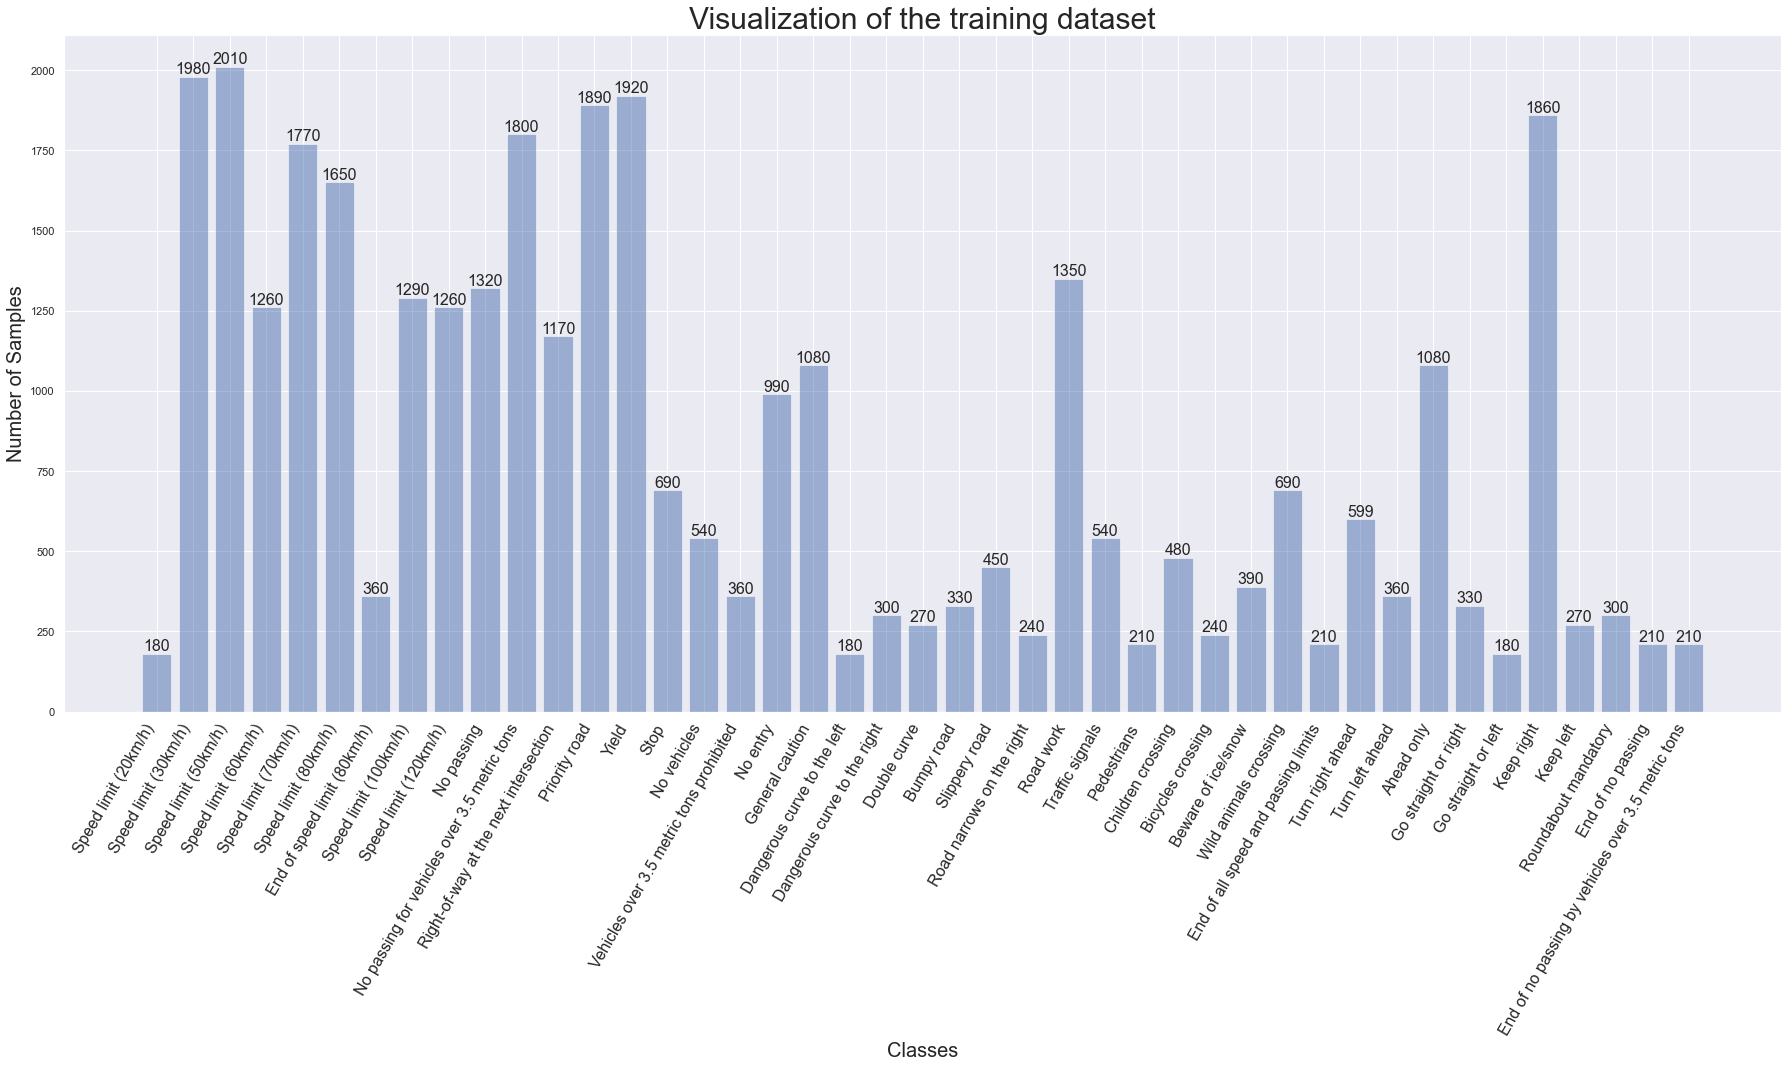

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class_arr = []
samples_arr = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    class_arr.append(class_n)
    samples_arr.append(n_samples)

# Set the default Seaborn color theme
sns.set()

# Create a larger figure with a size of (10, 6) inches
plt.figure(figsize=(25, 15))

# Create the bar plot and add annotations for the number of samples on top
plt.bar(class_arr, samples_arr, align='center', alpha=0.5)
for i, v in enumerate(samples_arr):
    plt.text(class_arr[i], v, str(v), ha='center', va='bottom', fontsize = 16)

# Set the class names as x-axis labels with vertical orientation
plt.xticks(class_arr, class_names, rotation=60, ha='right', fontsize = 16)

plt.xlabel('Classes', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
plt.title('Visualization of the training dataset', fontsize = 30)
plt.tight_layout()
plt.show()


The above bar chart shows the number of samples in each of the traffic sign classes. As we can observe from the graph, some class has only 180 samples (Speed limit (20km/h), Dangerous curve to the left, and Go straight or left class), while other has over 2000 samples (e.g., 2010 samples in Speed limit (50km/h) class). To further visualize the class imbalance, we plot the following:

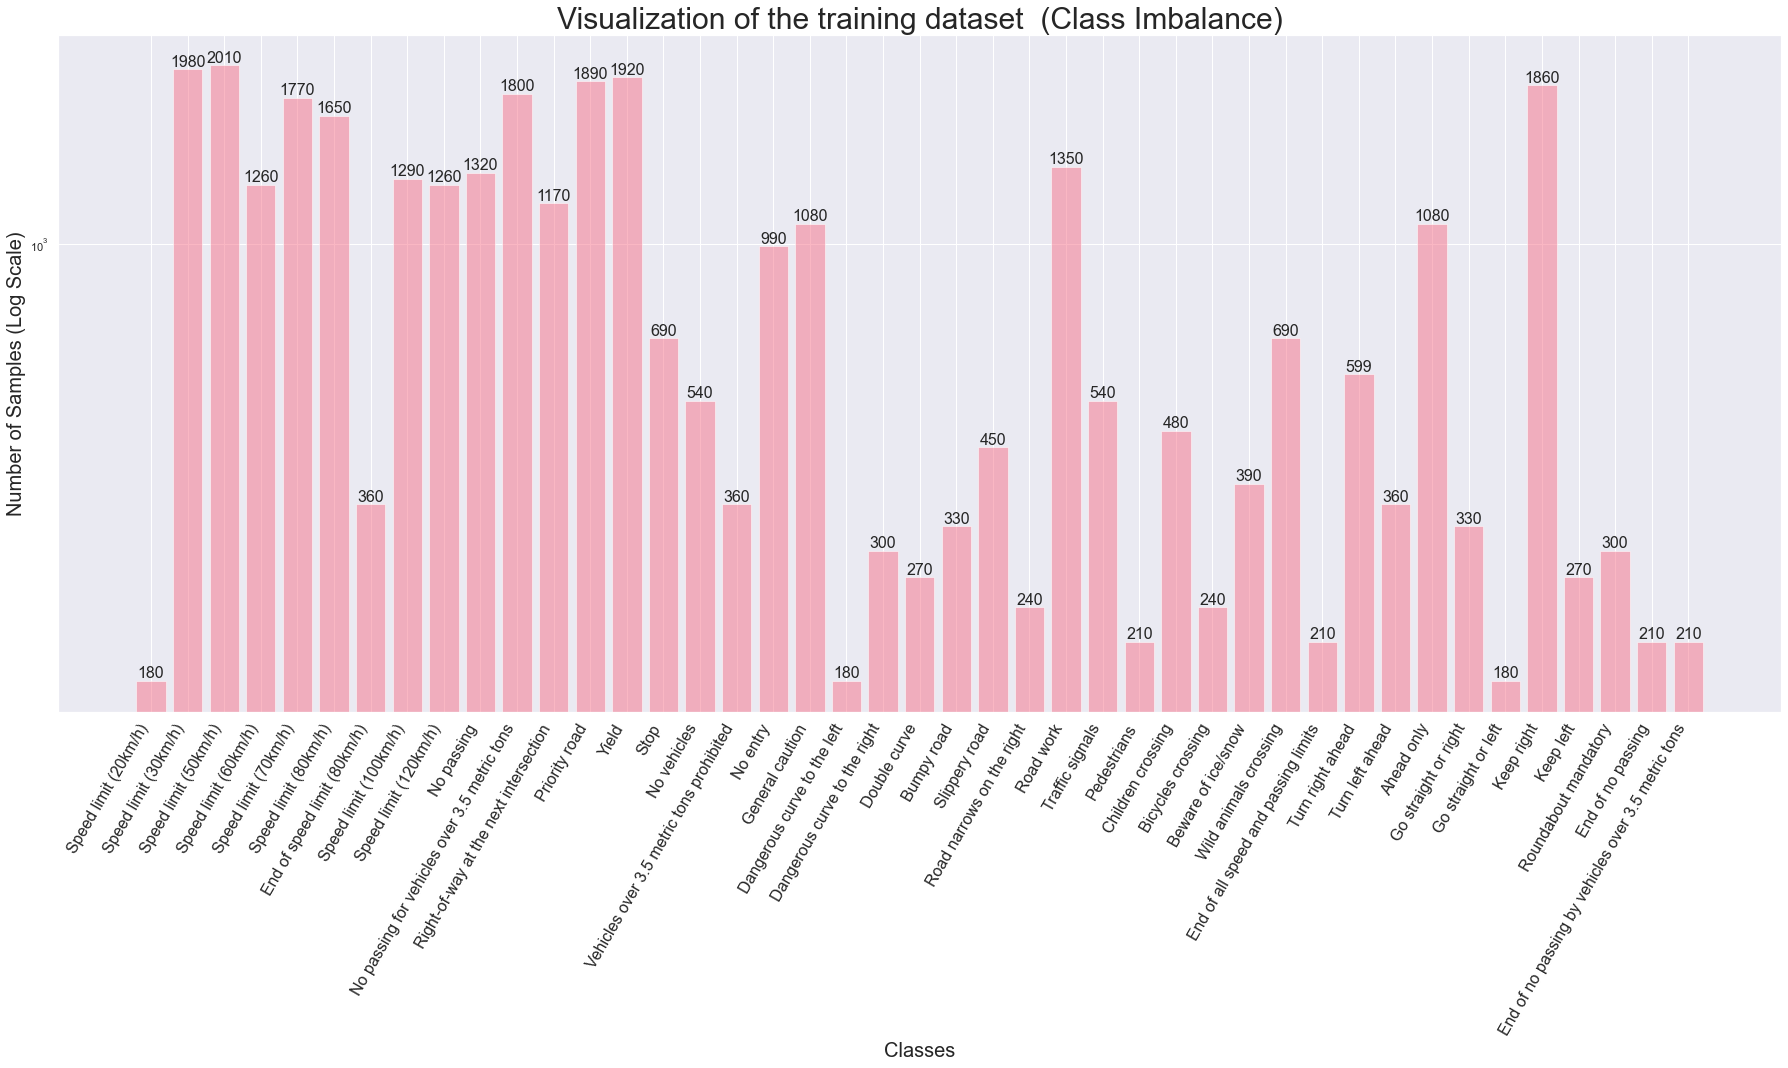

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class_arr = []
samples_arr = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    class_arr.append(class_n)
    samples_arr.append(n_samples)

# Set the default Seaborn color theme
sns.set_palette("husl")


# Create a larger figure with a size of (10, 6) inches
plt.figure(figsize=(25, 15))

# Create the bar plot and add annotations for the number of samples on top
plt.bar(class_arr, samples_arr, align='center', alpha=0.5)
for i, v in enumerate(samples_arr):
    plt.text(class_arr[i], v, str(v), ha='center', va='bottom', fontsize = 16)

# Set the class names as x-axis labels with vertical orientation
plt.xticks(class_arr, class_names, rotation=60, ha='right', fontsize = 16)


# Set the y-axis to a logarithmic scale
plt.yscale('log')

plt.xlabel('Classes', fontsize = 20)
plt.ylabel('Number of Samples (Log Scale)', fontsize = 20)
plt.title('Visualization of the training dataset  (Class Imbalance)', fontsize = 30)
plt.tight_layout()
plt.show()

### 3.3.2 Class imbalance 

In this bar chart, y-axis is displayed in a logarithmic scale, which will make the bars of classes with fewer samples more visible and distinguishable from the classes with a larger number of samples. This visual representation effectively highlights the significant class imbalance amongst the 43 classes in the training dataset.

Notably, classes like "Speed limit (20km/h)," "Dangerous curve to the left," and "Go straight or left" are severely under-represented, with only 180 samples each. In contrast, the class "Speed limit (50km/h)" stands out with a substantial number of 2010 samples, indicating a significant over-representation compared to the other classes. This severe class imbalance poses a challenge for the training process, as the model may become biased towards the majority classes, leading to potential difficulties in accurately recognizing and classifying the underrepresented classes during inference. 

Addressing this imbalance is crucial to ensure the model's effectiveness. Techniques such as data augmentation, class weighting, or resampling strategies can be employed to mitigate the impact of class imbalance. We will discuss these techniques further in later section.

### 3.3.3 Visualizing the yolo_GTSRB dataset

In [ ]:
def count_images_per_class(dataset_path):
    class_counts = {f'class_{i}': 0 for i in range(43)}

    # Get a list of image annotation (txt) file names in the dataset directory
    annotation_files = [f for f in os.listdir(dataset_path) if f.lower().endswith('.txt')]

    # Count the occurrences of each class in the annotation files
    for annotation_file in annotation_files:
        annotation_path = os.path.join(dataset_path, annotation_file)
        with open(annotation_path, 'r') as file:
            for line in file:
                class_index = int(line.strip().split()[0])
                class_counts[f'class_{class_index}'] += 1

    return class_counts

train_dataset_path = "./yolo_GTSRB/yolo/train/"
class_counts_train = count_images_per_class(train_dataset_path)

class1_arr = []
samples1_arr = []

print("Number of images per class in the training set:")
for class_name, count in class_counts_train.items():
    class1_arr.append(class_name)
    samples1_arr.append(count)
    print(f"{class_name}: {count}")


Number of images per class in the training set:
class_0: 150
class_1: 1500
class_2: 1500
class_3: 960
class_4: 1320
class_5: 1260
class_6: 300
class_7: 960
class_8: 960
class_9: 990
class_10: 1350
class_11: 900
class_12: 1410
class_13: 1440
class_14: 540
class_15: 420
class_16: 300
class_17: 750
class_18: 810
class_19: 150
class_20: 240
class_21: 240
class_22: 270
class_23: 360
class_24: 180
class_25: 1020
class_26: 420
class_27: 180
class_28: 360
class_29: 180
class_30: 300
class_31: 540
class_32: 180
class_33: 480
class_34: 300
class_35: 810
class_36: 270
class_37: 150
class_38: 1380
class_39: 210
class_40: 240
class_41: 180
class_42: 180


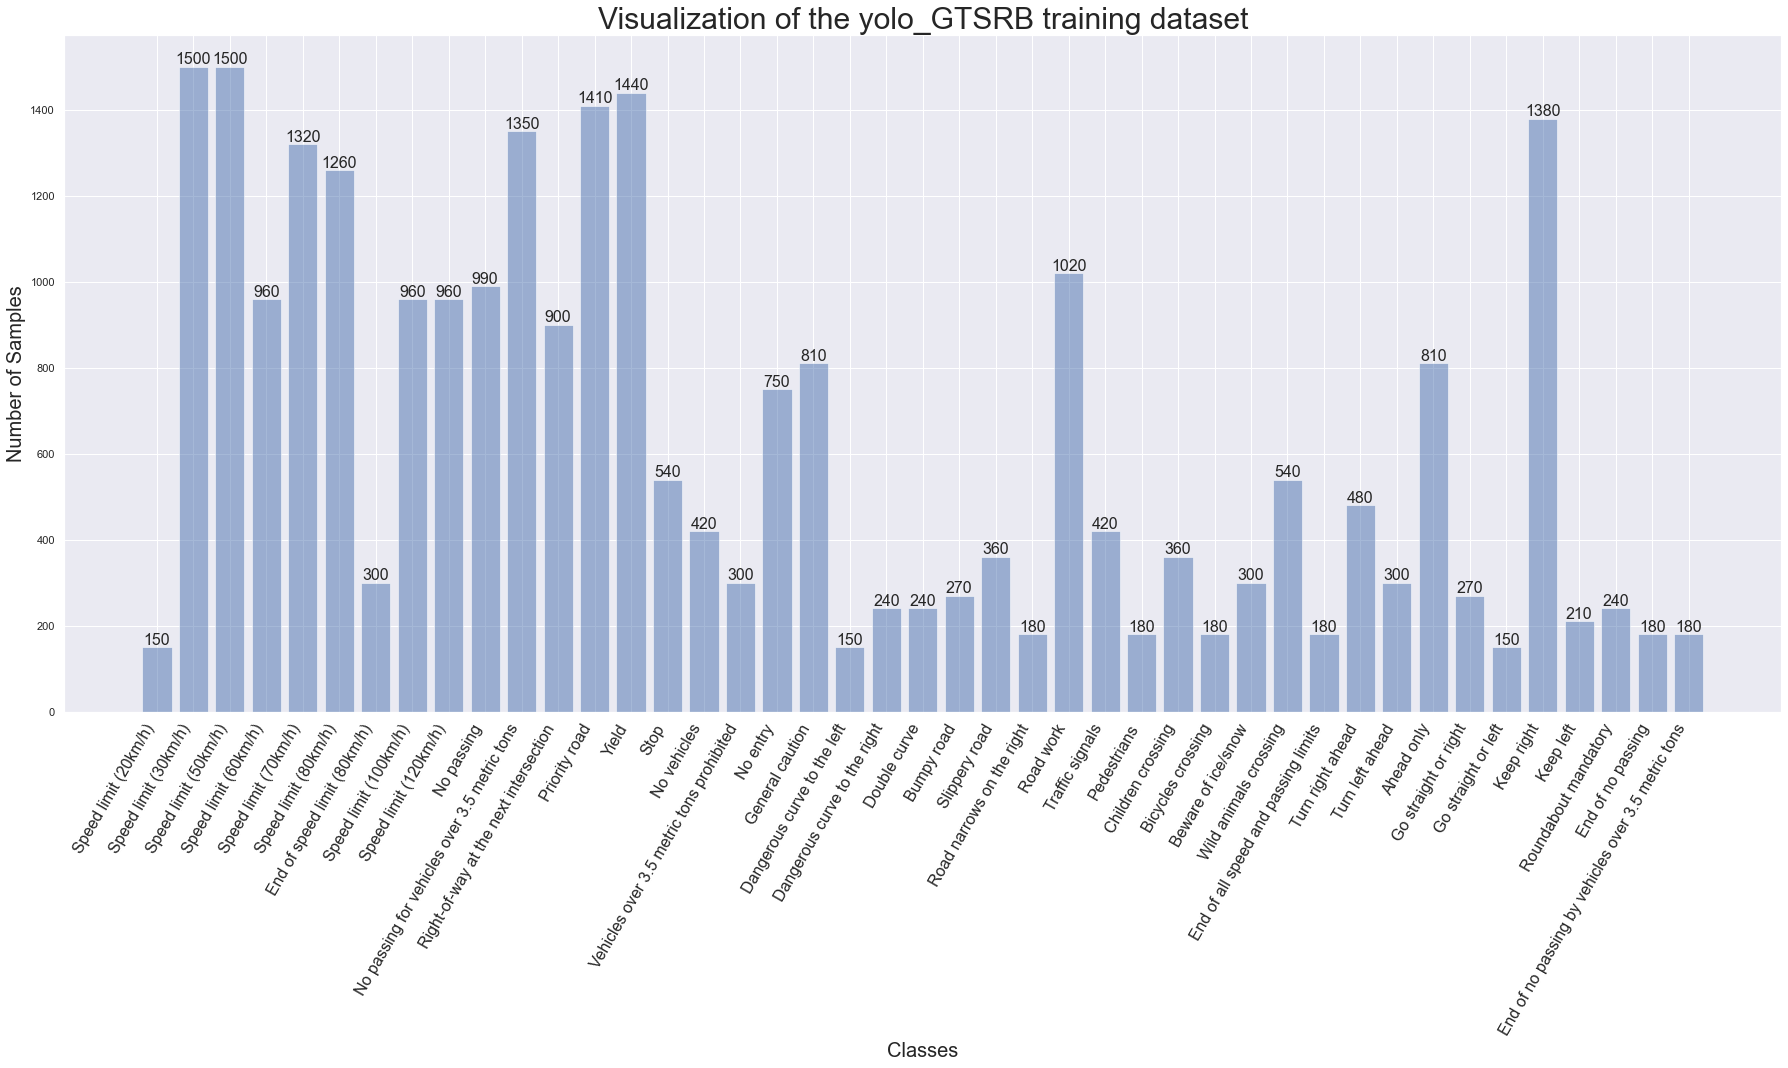

In [ ]:

# Set the default Seaborn color theme
sns.set()

# Create a larger figure with a size of (10, 6) inches
plt.figure(figsize=(25, 15))

# Create the bar plot and add annotations for the number of samples on top
plt.bar(class1_arr, samples1_arr, align='center', alpha=0.5)
for i, v in enumerate(samples1_arr):
    plt.text(class1_arr[i], v, str(v), ha='center', va='bottom', fontsize = 16)

# Set the class names as x-axis labels with vertical orientation
plt.xticks(class1_arr, class_names, rotation=60, ha='right', fontsize = 16)

plt.xlabel('Classes', fontsize = 20)
plt.ylabel('Number of Samples', fontsize = 20)
plt.title('Visualization of the yolo_GTSRB training dataset', fontsize = 30)
plt.tight_layout()
plt.show()

The issue of class imbalance could also be observed in the yolo_GTSRB dataset.

### 3.3.4 Visualizing the sample images from the pickled dataset 
We randomly display 3 sample images from the training set to further visualize and inspect the traffic sign dataset.

In [ ]:
import random

def plot_sample_images(dataset, isGray=False):
    # Dictionary to store the indices of images for each class
    class_indices_dict = {}

    # Find the indices of images for each class
    for class_id in np.unique(y_train):
        class_indices = np.where(y_train == class_id)[0]
        class_indices_dict[class_id] = class_indices

    # Set up the plot to display 3 images from each class
    num_images_per_class = 3
    num_classes = len(class_indices_dict)
    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(12, 3 * num_classes))
    fig.suptitle('Three Sample Images from Each Class of the Training Dataset')

    # Plot randomly selected images from each class
    for i, class_id in enumerate(class_indices_dict.keys()):
        class_indices = random.sample(list(class_indices_dict[class_id]), num_images_per_class)
        for j, idx in enumerate(class_indices):
            ax = axes[i, j]
            if isGray:
                ax.imshow(dataset[idx], cmap='gray')
            else:
                ax.imshow(dataset[idx])
            title = f"{class_id}. {class_names[class_id]}"
            ax.set_title(title)
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_sample_images(X_train)

![Alternative Text](<notebook_images/training set sample images.png>)

By examining the sample images that are randomly selected from the traffic sign training dataset, several challenges become evident. 

We saved one output image for further analysis, please see *training set sample images.png* above.

Some images suffer from poor lighting conditions, being either too dark (third image of class 19) or excessively bright (second image of class 41), making it hard for the model to extract relevant features accurately. Additionally, various images are hindered by obstructions such as trees (third image of class 14) or boards (third image of class 29), which may hide some critical sign information. Certain images appear tilted or rotated (second image of class 11), this also pose difficulties for the model in correctly recognizing the signs' orientations. Moreover, a subset of the images are very blurry (first image of class 13). This is likely caused by adverse weather conditions such as fog or rain, which can lead to reduced image clarity.

To cope with these challenges and improve the model's performance, we can use several pre-processing methods.

## 3.4 Importing Modules And Methods

In [13]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

#### Convert class vetors to binary class matrices

In [14]:
num_classes = n_classes
# save original y_train for data augmentation part
orig_y_train = y_train
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

## 3.5 Pre-process the Data Set (normalization, grayscale, etc.)

In this section, we apply pre-processing to the the image data. Firstly, the data set is normalized so that the data has mean zero and equal variance. Then we convert the image data to grayscale.

We tried other preprocessing techniques as showed below:

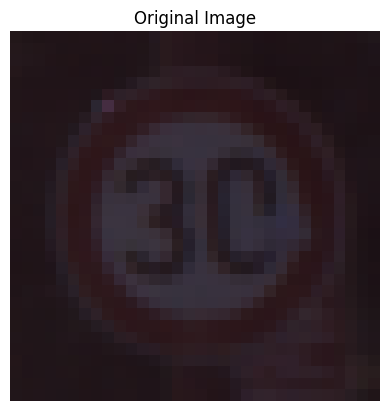

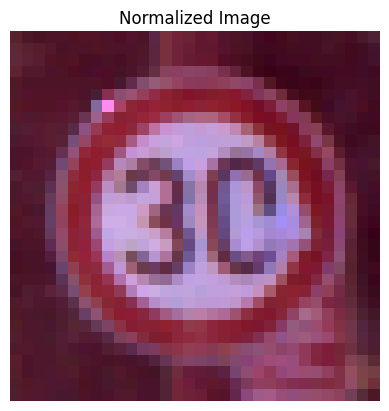

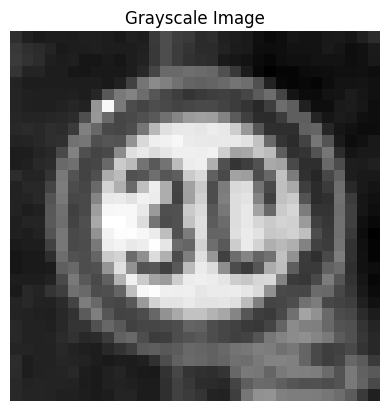

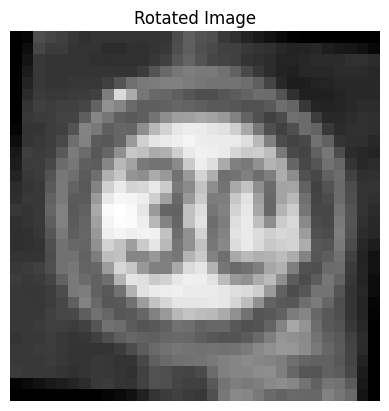

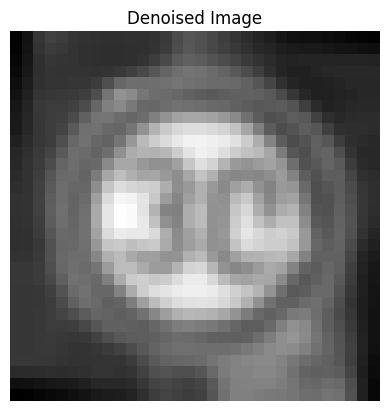

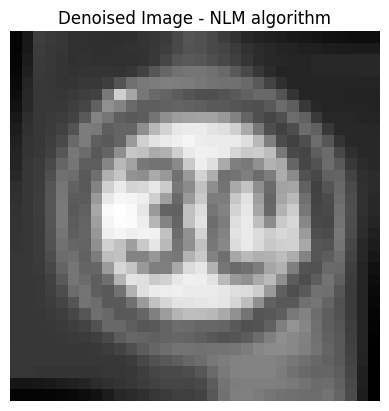

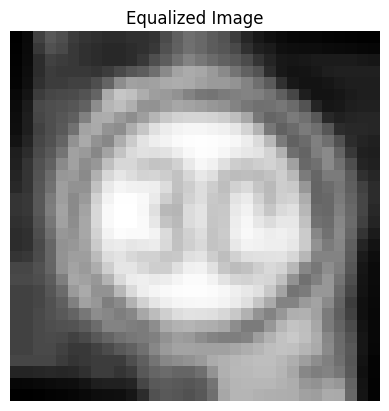

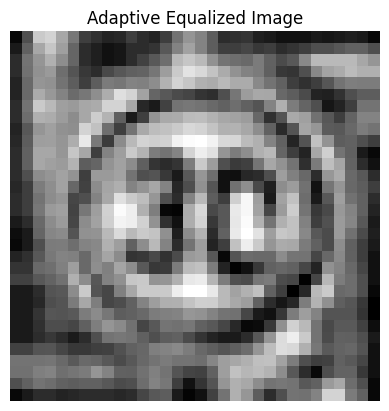

(32, 32, 1)


In [15]:
import cv2
import random

# Select a random image from X_train for visualization
random_image_idx = random.randint(0, len(X_train) - 1)
selected_image = X_train[random_image_idx]

# Display the original image
plt.imshow(selected_image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

def image_rotation(image):
    # Rotate the image by a random angle between -15 and 15 degrees
    angle = random.uniform(-15, 15)
    rows, cols = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def image_nlm_denoise(image):
    return cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

def image_equalization(image):
    return cv2.equalizeHist(image)

def image_adaptive_equalization(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)


def preprocess_image(orig_data, prep=False):
    """Pre-process the original image dataset to prepare them to be fed to the neural network.
    
    (1) normalization
    (2) convert to grayscale
    (3) affine transformations for tilted images (optional)
    (4) image denoising and deblurring
    (5) histogram equalization (optional)
    """
    # initialize empty image set for prepared images
    new_shape = image_shape[0:2] + (1,)
    prep_orig_data = np.empty(shape=(len(orig_data),) + new_shape, dtype=int)

    
    for ind in range(len(orig_data)):
        # normalize
        norm_img = cv2.normalize(orig_data[ind], np.zeros(image_shape[0:2]), 0, 255, cv2.NORM_MINMAX)
        
        # grayscale
        gray_img = cv2.cvtColor(norm_img, cv2.COLOR_RGB2GRAY)
        
        # apply additional pre-processing
        if prep:
            
            # affine transformations: random rotation
            # rotated_img = image_rotation(gray_img)

            # image denoising and deblurring: Gaussian filtering

            # denoised_img = cv2.GaussianBlur(rotated_img, (3, 3), 0)
            denoised_img = image_nlm_denoise(gray_img)

            # histogram equalization to enhance image contrast
            # equalized_img = image_equalization(denoised_img)
            # equalized_img = image_adaptive_equalization(denoised_img)
            

            # set new image to the corresponding position
            prep_orig_data[ind] = np.reshape(denoised_img, new_shape)
        else:
            # set preprocessed grayscale image for validation and test sets
            prep_orig_data[ind] = np.reshape(gray_img, new_shape)
        
    return prep_orig_data

# Pre-process the image step by step
# Normalize
normalized_img = cv2.normalize(selected_image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(normalized_img.squeeze(), cmap='gray')
plt.title('Normalized Image')
plt.axis('off')
plt.show()

# Grayscale Conversion
gray_img = cv2.cvtColor(normalized_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Data Augmentation (Random Rotation)
rotated_img = image_rotation(gray_img)
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.show()

# Image Denoising and Deblurring (Gaussian Filtering)
denoised_img = cv2.GaussianBlur(rotated_img, (3, 3), 0)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

denoised_nlm_img = image_nlm_denoise(rotated_img)
plt.imshow(denoised_nlm_img, cmap='gray')
plt.title('Denoised Image - NLM algorithm')
plt.axis('off')
plt.show()

# Histogram Equalization
equalized_img = image_equalization(denoised_img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

# Adaptive Histogram Equalization
adaptive_equalized_img = image_adaptive_equalization(denoised_img)
plt.imshow(adaptive_equalized_img, cmap='gray')
plt.title('Adaptive Equalized Image')
plt.axis('off')
plt.show()
# Preprocess the training set with data augmentation
X_train_prep = preprocess_image(X_train, prep=True)


# plot_sample_images(X_train_prep, isGray=True)

# Preprocess the validation and test sets without data augmentation
X_test_prep = preprocess_image(X_test)
X_valid_prep = preprocess_image(X_valid)

print(X_train_prep[0].shape)  # Should be (32, 32, 1) after preprocessing


The pre-processing steps we tried for the traffic sign data includes various important techniques.

Here are the advantages of each pre-processing step we tested out:

Normalization: Standardizing the pixel intensities to a specific range ensures consistent input values, which helps in stabilizing the training process.

Grayscale Conversion: Reducing the color channels to grayscale simplifies the model and eliminates color variations, which can improve generalization.

Affine Transformations (Random Rotation): Tilted images are aligned properly, reducing the potential bias in the model towards specific orientations.

Image Denoising and Deblurring (Gaussian Filtering/NLM algorithm): Removing noise and blurring can enhance image clarity and improve feature extraction.

Histogram Equalization: Equalizing the histogram enhances image contrast, making it easier for the model to discern features and details.

Additionally, we use plot_sample_images() to visualize the effects of pre-processing by displaying random images from the dataset.

After trying these techniques, we ended up using normalization + grayscale + de-noising(NLM algorithm). 

## 3.6 Data augmentation to address the class imbalance issue

High accuracy in deep learning often depends on a large training dataset. Obtaining a sufficient number of desired images in real-time is impractical sometimes. Hence, *data augmentation* resolves this issue by increasing the dataset size through parameter changes. This helps in achieving better parameter learning and addresses class imbalance in the training set.

Megalingam et al. mentioned the following augmentation techniques(2023):

* Image Rotation: the image is rotated either clockwise or anticlockwise. The resultant empty pixels are assigned pixel values of the adjacent pixel.

* Horizontal Flipping: The image is flipped on its y-axis.

* Brightness Change: The brightness of the image is modified, usually decreased, by subtracting a constant from all the pixel values.


* Right Shift & Left Shift: The image is moved left/right, by the removal of a portion of pixel values on the left/right side and shifting the image to the left/right side.

* Top Shifting & Bottom Shifting: The position of the objects in the image is moved up/down. 

Reference: https://doi.org/10.1016/j.ijtst.2022.06.002.
(https://www.sciencedirect.com/science/article/pii/S2046043022000557)

Keras also provides a simple method that can be used for Data Augmentation via the *keras.preprocessing.image.ImageDataGenerator* class. We tried the method, but it didn't address the class imbalance issue. Therefore we used the below method:

In [15]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

# Data augmentation pipeline
def augment_data(images):
    seq = iaa.Sequential([
        iaa.Sometimes(0.5, iaa.Affine(rotate=(-15, 15))),   # Random rotation
        iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=(0, 0.1*255))), # Gaussian noise
        iaa.Sometimes(0.5, iaa.Multiply((0.8, 1.2))),       # Brightness adjustment
    ], random_order=True)

    # Apply augmentation to each image
    augmented_images = seq(images=images)
    return augmented_images

# Find the classes with the maximum and minimum number of samples
max_samples = max(samples_arr)
min_samples = min(samples_arr)
print("Maximum number of samples: ", max_samples) #2010
print("Minimum number of samples: ", min_samples) #180

target_samples = 500

augmented_X_train = []
augmented_y_train = []

# Loop through each class
for class_label in range(43):
    # Find the indices of images belonging to the current class
    indices = np.where(orig_y_train == class_label)[0]
    num_samples = len(indices)
    
    if num_samples < target_samples:
        # Calculate the number of samples needed to reach the target 1000
        num_samples_to_augment = target_samples - num_samples
        
        # Randomly sample 'num_samples_to_augment' images from this class (with replacement if needed to cope with small classes)
        random_indices = np.random.choice(indices, num_samples_to_augment, replace=num_samples_to_augment > num_samples)
        # Get the corresponding images
        images_to_augment = X_train[random_indices]
        
        # Perform data augmentation
        augmented_images = augment_data(images_to_augment)
        
        # Add augmented images to the lists
        augmented_X_train.extend(augmented_images)
        augmented_y_train.extend([class_label] * num_samples_to_augment)

        orig_images = X_train[indices]

        # Keep original images
        augmented_X_train.extend(orig_images)
        augmented_y_train.extend([class_label] * num_samples)

    else:
        # Randomly undersample to reach the target
        random_indices = np.random.choice(indices, target_samples, replace=False)
        images_to_keep = X_train[random_indices]
        
        # Add the original images to the lists
        augmented_X_train.extend(images_to_keep)
        augmented_y_train.extend([class_label] * target_samples)

# Convert the lists to numpy arrays
augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)


# Shuffle the data while keeping the order consistent
shuffled_indices = np.random.permutation(augmented_X_train.shape[0])
balanced_X_train = augmented_X_train[shuffled_indices]
balanced_y_train = augmented_y_train[shuffled_indices]

balanced_X_train_prep = preprocess_image(balanced_X_train, prep=True)

print("Class Label | Original Number of Samples | Balanced Number")
for class_label in range(43):
    # Find the indices of images belonging to the current class

    indices = np.where(orig_y_train == class_label)[0]
    num_samples = len(indices)

    indices2 = np.where(balanced_y_train == class_label)[0]
    num_samples2 = len(indices2)
    print(class_label, " ", num_samples, num_samples2)

balanced_y_train = to_categorical(balanced_y_train, num_classes=43)
print(balanced_y_train.shape)

Maximum number of samples:  2010
Minimum number of samples:  180
Class Label | Original Number of Samples | Balanced Number
0   180 500
1   1980 500
2   2010 500
3   1260 500
4   1770 500
5   1650 500
6   360 500
7   1290 500
8   1260 500
9   1320 500
10   1800 500
11   1170 500
12   1890 500
13   1920 500
14   690 500
15   540 500
16   360 500
17   990 500
18   1080 500
19   180 500
20   300 500
21   270 500
22   330 500
23   450 500
24   240 500
25   1350 500
26   540 500
27   210 500
28   480 500
29   240 500
30   390 500
31   690 500
32   210 500
33   599 500
34   360 500
35   1080 500
36   330 500
37   180 500
38   1860 500
39   270 500
40   300 500
41   210 500
42   210 500
(21500, 43)


This ensures that each class has 500 samples by either oversampling through data augmentation or random undersampling. The original images are kept for classes with fewer than 500 samples, and augmented images are added to achieve the target number of samples. The shape of images are as follows:

In [149]:
print(balanced_X_train_prep[0].shape)

(32, 32, 1)


By applying the above data augmentation, we can quickly increase the amount of data for our imbalanced classes. This helps avoid overfitting and aids the model to classify the traffic signs better.

*However*, it is essential to notice that while data augmentation helps rapidly increase the sample size for our imbalanced classes, there are certain `trade-offs`. Some classes have undergone significant `downsizing` (e.g., from 2010 to 500 samples). This downsizing may potentially lead to the loss of essential features within these classes during the training process, subsequently impacting their classification accuracy. Thus, we need a `careful balance` between data augmentation and the preservation of critical class characteristics to ensure accuracy & performance. Due to time constraint, we set the target sample size as 500 at this stage, but we would like to try higher numbers such as *1000 or 1500+* for each class.

---
# 4. Models and Methods

## 4.1 Model1 - LeNet

### 4.1.1 Introduction

LeNet-5, also known simply as LeNet, is one of the pioneering Convolutional Neural Network (CNN) architectures introduced by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner in 1998. It was designed for handwritten digit recognition and played a crucial role in popularizing the concept of deep learning and convolutional neural networks.

LeNet-5 was groundbreaking because it demonstrated that deep learning models with multiple layers of trainable parameters could outperform traditional algorithms for handwritten digit recognition. It provided a foundation for the development of more complex CNN architectures that followed in the subsequent years. While LeNet-5 is relatively simple compared to modern CNNs, it remains an essential milestone in the history of deep learning and paved the way for numerous advancements in computer vision and other fields.

![Alternative Text](<notebook_images/4.1.1.png>)

### 4.1.2 How it works

1. Input: LeNet-5 takes a 32x32 grayscale image of a handwritten digit (e.g., 0 to 9) as input.

2. Convolutional Layers: The first layer is a convolutional layer with six filters (also known as kernels) of size 5x5. Each filter slides over the input image, performing element-wise multiplications and summations to produce six feature maps (also called activation maps). 

3. Activation Function: After each convolutional layer, a sigmoid activation function is applied to introduce non-linearity.

4. Pooling Layers: Following each activation layer, a subsampling (pooling) layer is applied. LeNet-5 uses average pooling with a 2x2 window and a stride of 2. 

5. Flattening: After the last pooling layer, the feature maps are flattened into a 1D vector.

6. Fully Connected Layers: The flattened vector is fed into two fully connected layers. 

7. Output Layer: The final layer is another fully connected layer with 10 neurons, corresponding to the 10 possible classes (digits 0 to 9). 

8. Training: LeNet-5 is trained using a labeled dataset of handwritten digits (e.g., MNIST dataset). During training, the model's parameters (weights and biases) are learned using backpropagation and gradient descent optimization to minimize a loss function, such as cross-entropy loss.

9. Inference: Once trained, LeNet-5 can be used for inference on new, unseen images. The input image is passed through the network, and the output layer produces a probability distribution over the 10 possible classes. 

### 4.1.3 Defining Model and Generate Model Summary

In [27]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])
        

leNet_model = LeNet(X_train_prep[0].shape, n_classes)

leNet_model.summary()

Model: "le_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               692

### 4.1.4 TensorBoard callback for visualization

In [28]:
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 4.1.5 Train the model with source dataset

In [121]:
### Train the model here.
history = leNet_model.fit(X_train_prep, y=y_train, 
          epochs=50, 
          validation_data=(X_valid_prep, y_valid), 
          callbacks=[tensorboard_callback])

Epoch 1/50
1088/1088 [==============================] - 38s 33ms/step - loss: 0.7182 - accuracy: 0.8232 - val_loss: 0.4292 - val_accuracy: 0.8764
Epoch 2/50
1088/1088 [==============================] - 20s 19ms/step - loss: 0.1814 - accuracy: 0.9551 - val_loss: 0.3316 - val_accuracy: 0.9018
Epoch 3/50
1088/1088 [==============================] - 21s 19ms/step - loss: 0.1100 - accuracy: 0.9723 - val_loss: 0.3415 - val_accuracy: 0.9027
Epoch 4/50
1088/1088 [==============================] - 22s 20ms/step - loss: 0.0768 - accuracy: 0.9804 - val_loss: 0.3335 - val_accuracy: 0.9063
Epoch 5/50
1088/1088 [==============================] - 22s 20ms/step - loss: 0.0611 - accuracy: 0.9843 - val_loss: 0.3231 - val_accuracy: 0.9127
Epoch 6/50
1088/1088 [==============================] - 22s 20ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.2958 - val_accuracy: 0.9184
Epoch 7/50
1088/1088 [==============================] - 21s 19ms/step - loss: 0.0453 - accuracy: 0.9871 - val_loss: 0.3195 -

We can plot the Training&Validation accuracy and Training&Validation loss figures as shown below:

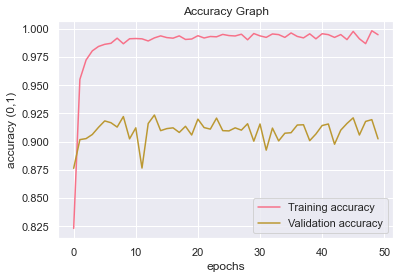

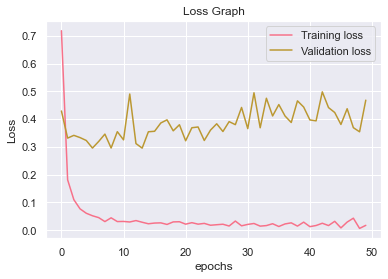

In [122]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Accuracy Evaluation

In [42]:
print("Evaluate")
result = leNet_model.evaluate(x=X_test_prep, y=y_test)
dict(zip(leNet_model.metrics_names, result))

Evaluate


395/395 [==============================] - 13s 30ms/step - loss: 0.5267 - accuracy: 0.9051


{'loss': 0.5267404317855835, 'accuracy': 0.9051464796066284}

#### Save the model

In [ ]:
# Saving the model
leNet_model.save('LeNet_saved_model/')

INFO:tensorflow:Assets written to: LeNet_saved_model/assets


INFO:tensorflow:Assets written to: LeNet_saved_model/assets


### 4.1.6 Training the model with balanced dataset

In [ ]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])
        

leNet_Balance_model = LeNet(X_train_prep[0].shape, n_classes)

leNet_Balance_model.summary()

Model: "le_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               692

In [172]:
history = leNet_Balance_model.fit(balanced_X_train_prep, y=balanced_y_train, 
          epochs=30, 
          validation_data=(X_valid_prep, y_valid), 
          callbacks=[tensorboard_callback])

Epoch 1/30
672/672 [==============================] - 18s 22ms/step - loss: 0.9467 - accuracy: 0.7905 - val_loss: 0.4382 - val_accuracy: 0.8741
Epoch 2/30
672/672 [==============================] - 14s 22ms/step - loss: 0.2227 - accuracy: 0.9481 - val_loss: 0.3168 - val_accuracy: 0.9075
Epoch 3/30
672/672 [==============================] - 16s 24ms/step - loss: 0.1348 - accuracy: 0.9681 - val_loss: 0.3552 - val_accuracy: 0.8909
Epoch 4/30
672/672 [==============================] - 16s 24ms/step - loss: 0.0873 - accuracy: 0.9787 - val_loss: 0.2685 - val_accuracy: 0.9204
Epoch 5/30
672/672 [==============================] - 15s 23ms/step - loss: 0.0567 - accuracy: 0.9880 - val_loss: 0.2715 - val_accuracy: 0.9252
Epoch 6/30
672/672 [==============================] - 13s 20ms/step - loss: 0.0521 - accuracy: 0.9870 - val_loss: 0.2964 - val_accuracy: 0.9077
Epoch 7/30
672/672 [==============================] - 15s 23ms/step - loss: 0.0422 - accuracy: 0.9900 - val_loss: 0.3680 - val_accuracy:

Plot the Training&Validation accuracy and Training&Validation loss figures as shown below:

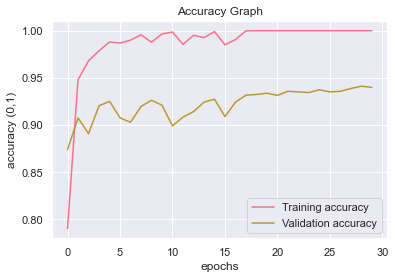

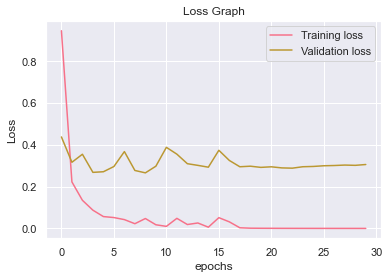

In [173]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot the Confusion Matrix after training LeNet with balanced dataset

395/395 [==============================] - 5s 11ms/step


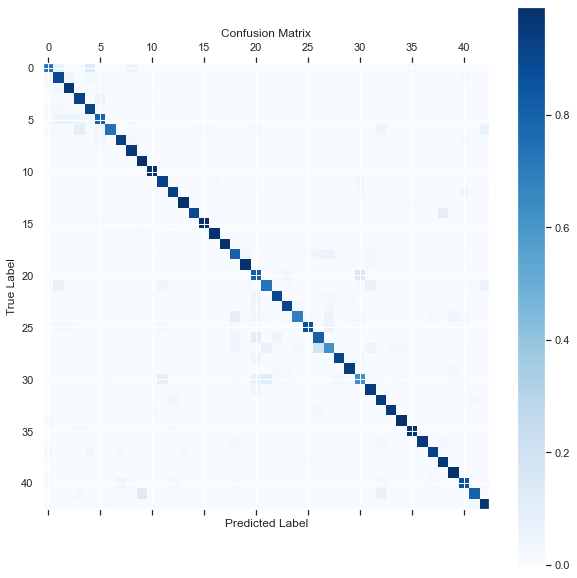

In [174]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
y_pred = leNet_Balance_model.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Compute the total sample count for each class
class_sample_count = np.sum(conf_mat, axis=1)

# Calculate the percentage for each element in the confusion matrix
conf_mat_percent = (conf_mat.T / class_sample_count).T 

# Plot the confusion matrix with percentage values
plt.figure(figsize=(10, 10))
plt.matshow(conf_mat_percent, cmap=plt.cm.Blues, fignum=1)

# Add colorbar for percentage scale
plt.colorbar()

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

#### Accuracy Evaluation

In [175]:
print("Evaluate")
result = leNet_Balance_model.evaluate(x=X_test_prep, y=y_test)
dict(zip(leNet_Balance_model.metrics_names, result))

Evaluate
395/395 [==============================] - 3s 8ms/step - loss: 0.4418 - accuracy: 0.9159


{'loss': 0.441842645406723, 'accuracy': 0.9159144759178162}

#### Save the model

In [ ]:
# Saving the model
leNet_Balance_model.save('LeNet_saved_model_balanced/')

INFO:tensorflow:Assets written to: LeNet_saved_model_balanced/assets


INFO:tensorflow:Assets written to: LeNet_saved_model_balanced/assets


## 4.2 Model2 - VGG

### 4.2.1 Introduction

The Visual Geometry Group Network, commonly known as VGGNet, is a highly influential deep convolutional neural network architecture. Proposed by the Visual Geometry Group at the University of Oxford in 2014, VGGNet's significance lies in its depth and the uniformity of its structure. Its design consists of multiple layers of small (3x3) convolutional filters followed by a max-pooling step, repeated numerous times to form a deep network. This depth allows VGGNet to learn complex hierarchical features, and the small filter size keeps the computational complexity manageable. The architecture's uniformity makes it straightforward to understand, adapt, and implement. VGGNet's pre-trained models on ImageNet have also been used extensively for transfer learning, providing a strong starting point for many computer vision tasks. Despite its computational intensity and the advent of more efficient architectures, VGGNet remains a common choice in the field of computer vision, including traffic sign recognition.

### 4.2.2 How it works

1. VGGNet comes in two main variants: VGG16 (16 layers) and VGG19 (19 layers).

2. Each variant consists of a stack of convolutional layers, followed by a max-pooling layer. This combination is repeated several times.
3. The convolutional layers use small 3x3 filters. This is a key feature of the VGGNet architecture, as it allows the network to learn complex features with fewer parameters.
4. All convolutional layers employ the ReLU (Rectified Linear Unit) activation function.
5. The max-pooling layers use a 2x2 window with a stride of 2 to reduce the spatial dimensions of the feature maps.
6. After the convolutional and pooling layers, there are two fully connected layers, each consisting of 4096 nodes.
7. The network concludes with a final fully connected layer that uses a softmax activation function to output the probabilities for each class.
8. VGGNet can also be used as a feature extractor for oth

### 4.2.3 Why we choose this

1. Uniform and Simple Architecture: VGGNet's architecture is uniform and easy to understand, which makes it simpler to implement, modify, and debug compared to more complex models.

2. Depth and Performance: VGGNet's depth allows it to learn a hierarchy of complex features, enabling it to achieve excellent performance on a variety of image recognition tasks, including traffic sign recognition.

3. Transfer Learning: Pre-trained VGGNet models, which have already learned useful features from large-scale datasets like ImageNet, can be fine-tuned for specific tasks. This can significantly accelerate training and improve performance, especially when the amount of available data is limited.

### 4.2.4 Defining Model and Generate Model Summary

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy

class MiniVGG(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=input_shape))
        self.add(Conv2D(6, (5, 5), activation='relu', padding='same'))
        self.add(MaxPooling2D((2, 2)))

        # Block 2
        self.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
        self.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
        self.add(MaxPooling2D((2, 2)))

        # Fully connected layers
        self.add(Flatten())
        self.add(Dense(128, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(loss=categorical_crossentropy,
                     optimizer='adam',
                     metrics=['accuracy'])

vgg_model = MiniVGG(X_train_prep[0].shape, n_classes)

vgg_model.summary()

Model: "mini_vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 6)         906       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                     

### 4.2.5 TensorBoard callback for visualization

In [19]:
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 4.2.6 Train the model

In [21]:
history = vgg_model.fit(X_train_prep, y_train, 
                    epochs=50, 
                    validation_data=(X_valid_prep, y_valid), 
                    callbacks=[tensorboard_callback])

Epoch 1/50
1088/1088 [==============================] - 27s 24ms/step - loss: 1.0342 - accuracy: 0.7393 - val_loss: 0.6329 - val_accuracy: 0.8340
Epoch 2/50
1088/1088 [==============================] - 27s 25ms/step - loss: 0.2486 - accuracy: 0.9274 - val_loss: 0.6166 - val_accuracy: 0.8540
Epoch 3/50
1088/1088 [==============================] - 28s 25ms/step - loss: 0.1575 - accuracy: 0.9543 - val_loss: 0.5515 - val_accuracy: 0.8907
Epoch 4/50
1088/1088 [==============================] - 28s 26ms/step - loss: 0.1228 - accuracy: 0.9642 - val_loss: 0.6163 - val_accuracy: 0.8871
Epoch 5/50
1088/1088 [==============================] - 27s 25ms/step - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.5568 - val_accuracy: 0.9091
Epoch 6/50
1088/1088 [==============================] - 27s 25ms/step - loss: 0.0936 - accuracy: 0.9731 - val_loss: 0.6406 - val_accuracy: 0.8989
Epoch 7/50
1088/1088 [==============================] - 28s 25ms/step - loss: 0.0892 - accuracy: 0.9737 - val_loss: 0.4219 -

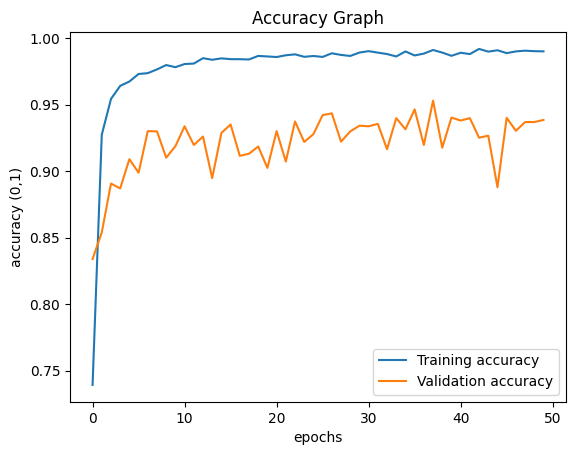

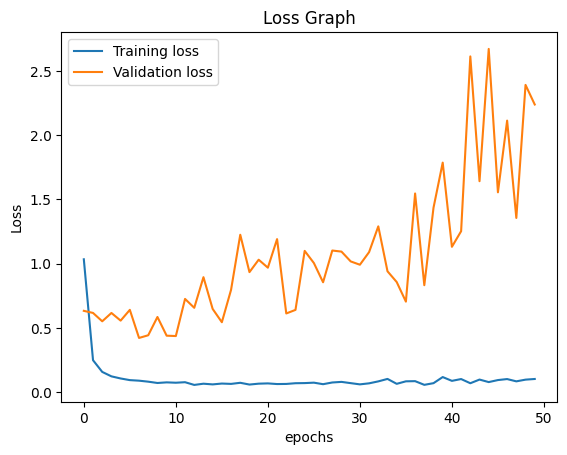

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Accuracy Evaluation

In [24]:
print("Evaluate")
result = vgg_model.evaluate(x=X_test_prep, y=y_test)
dict(zip(vgg_model.metrics_names, result))

Evaluate
395/395 [==============================] - 2s 5ms/step - loss: 3.4420 - accuracy: 0.9199


{'loss': 3.441985845565796, 'accuracy': 0.9198732972145081}

#### Save the model

In [25]:
# Save the model
vgg_model.save('VGG_saved_model/')

INFO:tensorflow:Assets written to: VGG_saved_model/assets


INFO:tensorflow:Assets written to: VGG_saved_model/assets


## 4.3 Model3 - Yolov5s

### 4.3.1 Introduction

"You Only Look Once" or YOLO is an advanced object detection system highly regarded for its capability in real-time object detection. In terms of its operational approach, YOLO functions as a single-stage detector akin to SSD, but it deviates from the methods of RCNN.

The YOLO model has undergone significant enhancements since the first iteration, YOLOv1, was launched in 2016. This continuous development has brought us to YOLOv7, an impressive feat considering that the original developer, Redmond, halted his contributions after YOLOv3. For our project focused on traffic sign classification, we have elected to use YOLOv5, a version released in 2020. YOLOv5 isn't just a standalone model but a collection of compound-scaled object detection models, among which we chose the YOLOv5s model for our project.

There are various versions of YOLOv5
1. yolov5-n - The nano version
2. yolov5-s - The small version
3. yolov5-m - The medium version
4. yolov5-l – The large version
5. yolov5-x - The extra-large version

Here are several pre-trained checkpoints of various models, which assist in comparing the performance of these models.

![Alternative Text](<notebook_images/pretrained checkpoints.png>)

### 4.3.2 How it works

1. Grid Division: YOLO divides the input image into an S x S grid. Each cell in the grid is responsible for detecting objects that are primarily contained within it.

2. Bounding Box and Class Prediction: Each grid cell generates a fixed number of bounding boxes and class probabilities. A bounding box is defined by its coordinates and dimensions. Each bounding box comes with a confidence score, which represents how likely it is that the box contains an object (objectness score) and how accurate it thinks the box is (how well the predicted box fits the actual box). The class probabilities denote the likelihood of the object belonging to a particular class (for example, 'dog', 'car', etc.).

3. Score Thresholding: Class probability is multiplied by the confidence score for each bounding box to give the final class scores for each box. These scores represent how likely it is that each bounding box contains each type of object. All boxes with final class scores below a certain threshold are discarded, and the rest are kept as detected objects.

4. Non-max Suppression: Since multiple bounding boxes may be detected around the same object, Non-max Suppression (NMS) is used to consolidate this down to just one bounding box per object. Essentially, it looks at overlapping boxes and keeps the one with the highest final class score, removing all others.

### 4.3.3 Why We Choose This

![Alternative Text](<./notebook_images/why we choose this.png>)

1. We opt for YOLOv5 due to its unparalleled accessibility and emphasis on practical, real-world results. It simplifies the complexity of machine learning, making the object detection task approachable.

2. Its strengths extend to performance as well, the model is designed to deliver accurate and speedy real-time object detection. This is particularly crucial in time-sensitive applications like autonomous driving.

3. Moreover, YOLOv5's customizable nature means we can tweak it to suit specific task requirements, from adjusting model size to input resolution. This level of flexibility isn't always available with other models, making YOLOv5 stand out.

### 4.3.4 Implementation

The source code for yolo5s is contained in the directory __yolov5s_model__

**4.3.4.1 Installation**

1. cd yolov5s_model
2. conda create -n yolov5 python=3.8
3. conda activate yolov5
4. pip install -r requirements.txt
5. unzip yolo_GTSRB.zip into root of yolov5s_model directory

__4.3.4.2 Training__

We unzipped the German Traffic Sign Detection Benchmark(GTSRB) dataset into the __yolov5s_model directory__
and run the following command to start the training

__python train.py --img 640 --batch 16 --epochs 150 --data ./dataset.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_final3_150epoch_640__

We stored all the training output in the file __yolov5s_training_record.ipynb__

### 4.3.5 Evaluation

#### 4.3.5.1 Confusion Matrix

* __We initially train the model for 300 epochs, utilizing an image size of 64x64 pixels. The resulting confusion matrix is presented below:__

![Alternative Text](<./notebook_images/5.2.1.1.png>)

![Alternative Text](<./notebook_images/5.2.1.1 img2.png>)

* __The outcomes didn't align with our expectations. Upon reviewing the training log, we identified that the optimal results were achieved at the 13th epoch. This indicates the image size used for training is too small. Consequently, we decided to enlarge the image size to 640*640 and conduct another training cycle for 50 epochs. The updated confusion matrix, after this modification, is displayed below:__

![Alternative Text](<./notebook_images/5.2.1.2.png>)

* __From the displayed image, it is evident that our trained YOLOv5 model is proficient in accurately identifying a majority of the traffic signs, which is in line with our expectations. However, to further enhance the accuracy, we conducted an extended training cycle of 150 epochs with image size of 640*640 unchanged, which resulted in a marginal improvement. The resulting confusion matrix is shown below.__

![Alternative Text](<./notebook_images/5.2.1.3.png>)

#### 4.3.5.2 Plot of Training

__The graph demonstrates a dramatic increase in the mAP50 from epoch 0 to approximately epoch 10. Following this rise, we observe some fluctuation in the value, which eventually stabilizes around the mark of 0.94.__

![Alternative Text](<./notebook_images/5.2.2.1.jpg>)

#### 4.3.5.3 Full Result

We have stored the full training results in yolov5s_results directory, including weights and plots.

#### 4.3.5.4 Future work

__Looking ahead, our priority should be to optimize the dataset, as we've identified notably low precision scores for the classes "Turn left ahead", "Go straight or left", and "Keep left". It might be beneficial to adjust the training set associated with these three classes to help our model more accurately capture the features of these traffic signs. In addition, future work should also encompass fine-tuning of parameters such as learning rate and momentum.__

![Alternative Text](<./notebook_images/future work.png>)

## 4.4 Model4 - Modified LeNet Models

### 4.4.1 Introduction

The modified model architecture is based on the LeNet model architecture (as explained in 4.1). 

Based on the training result of the baseline LeNet model (in 4.1), we can see that the model is performing well with high training accuracy and decent validation accuracy. However, as the training progresses, the validation accuracy starts to fluctuate, and there is a significant gap between the training accuracy and validation accuracy.

The purpose of adding dropout layers in the LeNet model is to prevent *overfitting*. Overfitting occurs when the model learns to memorize the training data rather than generalizing well to unseen data. This can lead to the model performs very well on the training data but poorly on new unseen data.


For example, in the baseline LeNet model:

Epoch 1: Training accuracy = 0.8232, Validation accuracy = 0.8764

Epoch 50: Training accuracy = 0.9947, Validation accuracy = 0.9025

By adding dropout layers, we introduce a regularization technique that helps reduce overfitting. Dropout randomly sets a fraction of the neurons' outputs to zero during training. 


### 4.4.2 Defining Model and Generate Model Summary

In [110]:
def create_modified_lenet(input_shape, num_classes, keep_prob=0.8):
    model = Sequential()
    
    # Layer 1: Convolutional
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding='valid'))

    # Layer 1: Pooling
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Layer 2: Convolutional
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

    # Layer 2: Pooling
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Layer 2: Flatten
    model.add(Flatten())
    
    # Layer 2: Dropout
    model.add(Dropout(1 - keep_prob))

    # Layer 3: Fully Connected
    model.add(Dense(120, activation='relu'))

    # Layer 3: Dropout
    model.add(Dropout(1 - keep_prob))

    # Layer 4: Fully Connected
    model.add(Dense(84, activation='relu'))

    # Layer 4: Dropout
    model.add(Dropout(1 - keep_prob))

    # Layer 5: Fully Connected
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

modified_model_unbalanced = create_modified_lenet(X_train_prep[0].shape, n_classes)
modified_model_unbalanced.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_25 (Flatten)        (None, 400)               0         
                                                                 
 dropout_59 (Dropout)        (None, 400)             

In [111]:
from keras.callbacks import ReduceLROnPlateau


# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=5, min_lr=0.0005, verbose=1)

We used the ReduceLROnPlateau callback. By using the callback, the training process becomes more adaptive. Thus, the model can adjust its learning rate based on the current state of the training. This can lead to better convergence and improved performance as compared to baseline LeNet model. We set the factor to reduce learning rate as 0.75, patience as 5. So that if the validation loss does not improve for 5 number of epochs, the learning rate will be decreased by multiply 0.75. We set the minimum learning rate to 0.0005 as we don't want the learning rate to be too small.

https://keras.io/api/callbacks/reduce_lr_on_plateau/

### 4.4.3 Modified Model Architecture

We can visualize the model architecture via the above model summary. We plot the architecture:

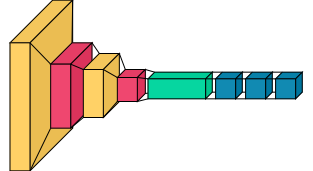

In [234]:
import visualkeras
visualkeras.layered_view(model, to_file='./notebook_images/modified_lenet_arch.png')

### 4.4.4 Training modified LeNet with unbalanced dataset

In [112]:
history = modified_model_unbalanced.fit(X_train_prep, y_train, 
                    epochs=150, 
                    batch_size=128, 
                    validation_data=(X_valid_prep, y_valid), 
                    callbacks=[reduce_lr])

Epoch 1/150
272/272 [==============================] - 18s 55ms/step - loss: 3.2165 - accuracy: 0.2472 - val_loss: 1.4915 - val_accuracy: 0.6281 - lr: 0.0010
Epoch 2/150
272/272 [==============================] - 12s 46ms/step - loss: 1.3528 - accuracy: 0.6123 - val_loss: 0.6874 - val_accuracy: 0.8107 - lr: 0.0010
Epoch 3/150
272/272 [==============================] - 13s 47ms/step - loss: 0.8484 - accuracy: 0.7497 - val_loss: 0.4452 - val_accuracy: 0.8780 - lr: 0.0010
Epoch 4/150
272/272 [==============================] - 11s 42ms/step - loss: 0.6255 - accuracy: 0.8154 - val_loss: 0.3554 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 5/150
272/272 [==============================] - 11s 41ms/step - loss: 0.5109 - accuracy: 0.8483 - val_loss: 0.3122 - val_accuracy: 0.9066 - lr: 0.0010
Epoch 6/150
272/272 [==============================] - 11s 40ms/step - loss: 0.4284 - accuracy: 0.8732 - val_loss: 0.3064 - val_accuracy: 0.9218 - lr: 0.0010
Epoch 7/150
272/272 [==============================]

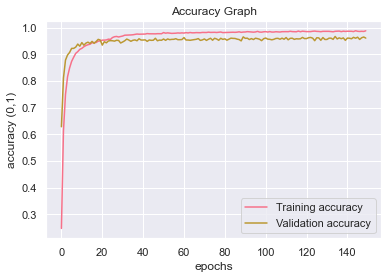

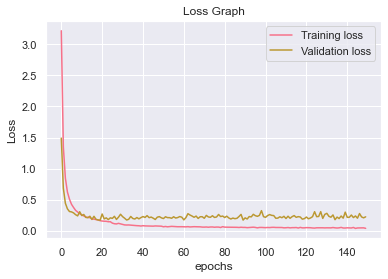

In [113]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

395/395 [==============================] - 4s 9ms/step


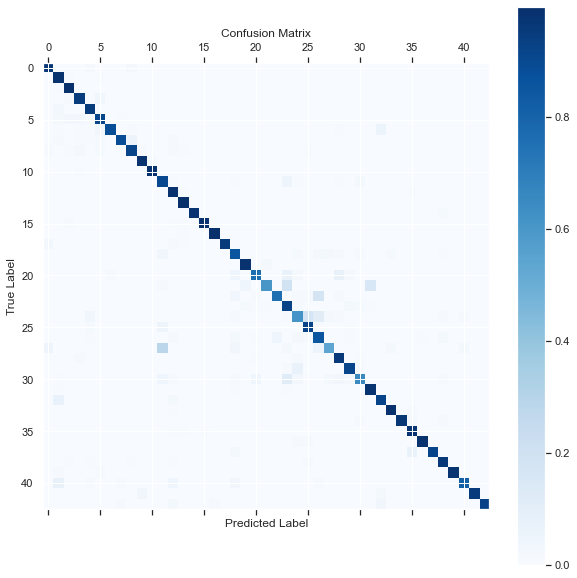

In [131]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
y_pred = modified_model_unbalanced.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Compute the total sample count for each class
class_sample_count = np.sum(conf_mat, axis=1)

# Calculate the percentage for each element in the confusion matrix
conf_mat_percent = (conf_mat.T / class_sample_count).T 

# Plot the confusion matrix with percentage values
plt.figure(figsize=(10, 10))
plt.matshow(conf_mat_percent, cmap=plt.cm.Blues, fignum=1)

# Add colorbar for percentage scale
plt.colorbar()

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

#### Save the model

In [114]:
# Save the model
modified_model_unbalanced.save('Modified_saved_model/')

INFO:tensorflow:Assets written to: Modified_saved_model/assets


INFO:tensorflow:Assets written to: Modified_saved_model/assets


#### Accuracy Evaluation

In [ ]:
print("Evaluate")
result = modified_model_unbalanced.evaluate(x=X_test_prep, y=y_test)
dict(zip(modified_model_unbalanced.metrics_names, result))

For the modified model with dropout layers add, we observe the following results:

Epoch 1: Training accuracy = 0.2472, Validation accuracy = 0.6281

Epoch 150: Training accuracy = 0.9876, Validation accuracy = 0.9603

The model with dropout has a higher validation accuracy at the end of training, indicating better generalization to unseen data. The fluctuations in the validation accuracy have also reduced as observed by comparing the plots. This suggests the dropout is helping to stabilize the model's performance.

In conclusion, adding dropout layers to the LeNet model prevents overfitting and improve the model's generalization capabilities.

### 4.4.5 Training modified LeNet with balanced dataset

In [130]:
modified_model_balanced = create_modified_lenet(balanced_X_train_prep[0].shape, n_classes)
history = modified_model_balanced.fit(balanced_X_train_prep, balanced_y_train, 
                    epochs=150, 
                    batch_size=128, 
                    validation_data=(X_valid_prep, y_valid), 
                    callbacks=[reduce_lr])

Epoch 1/150
168/168 [==============================] - 12s 55ms/step - loss: 5.7406 - accuracy: 0.0554 - val_loss: 3.3273 - val_accuracy: 0.1499 - lr: 0.0010
Epoch 2/150
168/168 [==============================] - 8s 47ms/step - loss: 2.6652 - accuracy: 0.2973 - val_loss: 1.7084 - val_accuracy: 0.5630 - lr: 0.0010
Epoch 3/150
168/168 [==============================] - 8s 46ms/step - loss: 1.6150 - accuracy: 0.5413 - val_loss: 1.1293 - val_accuracy: 0.6857 - lr: 0.0010
Epoch 4/150
168/168 [==============================] - 8s 48ms/step - loss: 1.2045 - accuracy: 0.6492 - val_loss: 0.8360 - val_accuracy: 0.7732 - lr: 0.0010
Epoch 5/150
168/168 [==============================] - 9s 52ms/step - loss: 0.9321 - accuracy: 0.7248 - val_loss: 0.6653 - val_accuracy: 0.8088 - lr: 0.0010
Epoch 6/150
168/168 [==============================] - 9s 52ms/step - loss: 0.7891 - accuracy: 0.7656 - val_loss: 0.5928 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 7/150
168/168 [==============================] - 8s

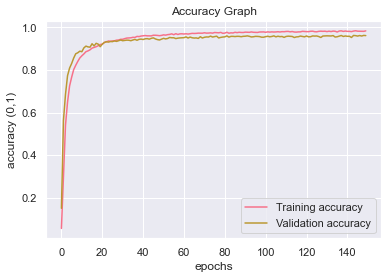

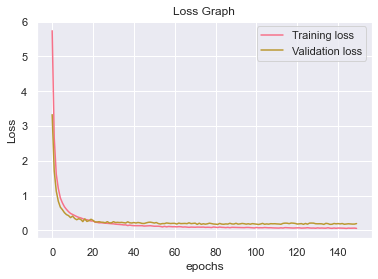

In [132]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

395/395 [==============================] - 3s 7ms/step


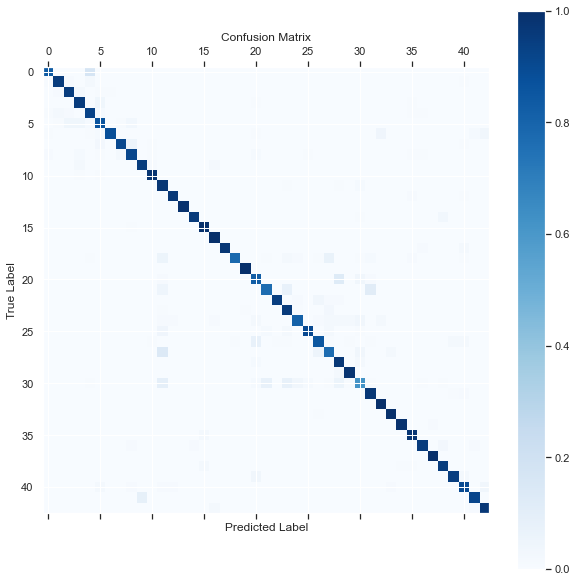

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
y_pred = modified_model_balanced.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Compute the total sample count for each class
class_sample_count = np.sum(conf_mat, axis=1)

# Calculate the percentage for each element in the confusion matrix
conf_mat_percent = (conf_mat.T / class_sample_count).T 

# Plot the confusion matrix with percentage values
plt.figure(figsize=(10, 10))
plt.matshow(conf_mat_percent, cmap=plt.cm.Blues, fignum=1)

# Add colorbar for percentage scale
plt.colorbar()

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

#### Save the model

In [134]:
# Save the model
modified_model_balanced.save('Modified_saved_model_balanced/')

INFO:tensorflow:Assets written to: Modified_saved_model_balanced/assets


INFO:tensorflow:Assets written to: Modified_saved_model_balanced/assets


#### Accuracy Evaluation

In [218]:
print("Evaluate")
result = modified_model_balanced.evaluate(x=X_test_prep, y=y_test)
dict(zip(modified_model_balanced.metrics_names, result))

Evaluate
395/395 [==============================] - 3s 8ms/step - loss: 0.3621 - accuracy: 0.9332


{'loss': 0.3620559573173523, 'accuracy': 0.9331749677658081}

## 4.5 improved LeNet with SVM classifier

### 4.5.1 Introduction

Yu et al. (2015) presented an improved LeNet5 for Handwritten digits recognition by replacing the last two layers of the LeNet5 structure with Support Vector Machines (SVM) classifier. In this case, LeNet5 performs as a trainable feature extractor and SVM works as a recognizer. We are inspired by their idea to improve our LeNet model for traffic sign classification.

We create the feature extractor part of the LeNet5 model (up to Layer 4) and name it feature_extractor. This part of the model will be used to extract features from the traffic sign images.

We then create an SVM classifier using scikit-learn's SVC class with a RBF kernel. The SVM classifier will take the extracted features and perform the final classification.

The combined_model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

By doing this, the LeNet5 model will act as a trainable feature extractor, and the SVM classifier will perform the recognition based on the extracted features.


Reference:  N. Yu, P. Jiao and Y. Zheng, "Handwritten digits recognition base on improved LeNet5," The 27th Chinese Control and Decision Conference (2015 CCDC), Qingdao, China, 2015, pp. 4871-4875, doi: 10.1109/CCDC.2015.7162796.

https://www.quora.com/How-can-I-make-CNN-with-SVM-as-classifier-on-the-last-layer

### 4.5.2 Defining Model and Generate Model Summary

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn("SVC")
from sklearn.svm import SVC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Layer, Lambda, Reshape

def create_modified_lenet_2(input_shape, num_classes, keep_prob=0.7):
    # LeNet5 feature extractor
    inputs = Input(shape=input_shape)
    x = Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)
    x = Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)
    x = Flatten()(x)
    x = Dropout(1 - keep_prob)(x)

    # LeNet5 fully connected layers
    x = Dense(120, activation='relu')(x)

    # Extract features
    feature_extractor = Model(inputs=inputs, outputs=x)

    return feature_extractor


feature_extractor = create_modified_lenet_2(balanced_X_train_prep[0].shape, n_classes)

# Get the features from the feature extractor for training the SVM
train_features = feature_extractor.predict(balanced_X_train_prep)

# SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')


# Train the SVM classifier with the features
y_train_classes = np.argmax(balanced_y_train, axis=1)
svm_model.fit(train_features, y_train_classes)

# Create a custom SVM prediction layer with the correct output shape
class SVMPredictionLayer(Layer):
    def __init__(self, svm_model, num_classes, **kwargs):
        super(SVMPredictionLayer, self).__init__(**kwargs)
        self.svm_model = svm_model
        self.num_classes = num_classes

def call(self, inputs):
    # Reshape to (-1, 120) to match the feature shape
    x_reshaped = tf.reshape(inputs, (-1, 120))

    # Use tf.py_function to invoke the SVM model's predict method
    predictions = tf.py_function(self.svm_model.predict, [x_reshaped], tf.float64)

    # Reshape to (-1, num_classes) to match the output shape
    predictions = tf.reshape(predictions, (-1, self.num_classes))

    return predictions


svm_predictions = SVMPredictionLayer(svm_model, n_classes)(feature_extractor.output)

print("feature_extractor output shape:", feature_extractor.output.shape)
print("svm_predictions shape:", svm_predictions.shape)

# Create the combined model
output_layer = Dense(n_classes, activation='softmax')(svm_predictions)
modified_model_svm = Model(inputs=feature_extractor.input, outputs=output_layer)

print("output_layer shape:", output_layer.shape)


# Compile the final_model
modified_model_svm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the combined model
modified_model_svm.summary()

672/672 [==============================] - 3s 4ms/step
feature_extractor output shape: (None, 120)
svm_predictions shape: (None, 120)
output_layer shape: (None, 43)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                     

We tried both linear kernal and non-linear kernels such as radial basis function (RBF). Non-linear kernels can capture more complex patterns in the data and improve the SVM's performance. Thus we use RBF instead of linear.

We tested different keep probability and found 0.7 performs the best. Higher values induce over-fitting while lower value cause under-fitting.

While training the SVM classifier, we found that the computation takes too long. Since the training time scales with O(num_samples² x num_features) so building a model can take a long time. We tried reducing the number of samples, as well as the method from Kalyanov (2020) by patching scikit-learn inside our code before importing it. I also attached the link to Intel Extension for Scikit-learn below:

Reference: https://medium.com/intel-analytics-software/from-hours-to-minutes-600x-faster-svm-647f904c31ae
https://intel.github.io/scikit-learn-intelex/quick-start.html

Originally, the time it take to build the model is > 2 hours, but now it only takes 2 minutes, so the above technique is very effective.

### 4.5.3 Model Architecture

The model architecture consists of two main parts:

1. Feature Extractor (LeNet5-like CNN):

The input to the feature extractor is a grayscale image with shape (32, 32, 1). The feature extractor consists of the following layers:

- Convolutional Layer: A 2D convolutional layer with 6 filters, kernel size (5, 5), and ReLU activation
- MaxPooling Layer: A 2D max-pooling layer with pool size (2, 2) and strides (2, 2)
- Convolutional Layer: Another 2D convolutional layer with 16 filters, kernel size (5, 5), and ReLU activation
- MaxPooling Layer: Another 2D max-pooling layer with pool size (2, 2) and strides (2, 2)
- Flatten Layer: A flatten layer to convert the 2D feature maps into a 1D vector
- Dropout Layer: A dropout layer with a dropout rate of `1 - keep_prob`, which is `0.3` in this case, so that we keep 70% of the neurons

After this, there is a fully connected layer with 120 units and ReLU activation, resulting in an output shape of(batch_size, 120).

2. SVM Prediction Layer:

The SVM prediction layer is a custom layer that takes the output of the feature extractor and applies an SVM classifier. The SVM model has already been trained on the extracted features and can predict the class labels for the input features. The predictions are then reshaped to match the number of classes (43 in this case), resulting in an output shape of (batch_size, 43).

3. Combined Model:

The combined model takes the output of the SVM prediction layer and applies a Dense layer with softmax activation to generate the final class probabilities. The output shape of this layer is (batch_size, 43), which represents the probability distribution over the 43 classes.

Overall, this model architecture combines a LeNet5-like CNN feature extractor with an SVM classifier to perform multi-class classification on pre-processed traffic sign images.

### 4.5.4 Train the model

In [ ]:
history_mod1 = modified_model_svm.fit(balanced_X_train_prep, balanced_y_train, 
                                      epochs=150,
                                      batch_size=128,
                                      validation_data=(X_valid_prep, y_valid),
                                      callbacks=[reduce_lr],
                                      steps_per_epoch=len(balanced_X_train_prep) // 128)

Epoch 1/150
167/167 [==============================] - 14s 79ms/step - loss: 5.0580 - accuracy: 0.1238 - val_loss: 2.4982 - val_accuracy: 0.3322 - lr: 0.0010
Epoch 2/150
167/167 [==============================] - 6s 37ms/step - loss: 1.9804 - accuracy: 0.4499 - val_loss: 1.1963 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 3/150
167/167 [==============================] - 7s 41ms/step - loss: 1.2572 - accuracy: 0.6394 - val_loss: 0.9151 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 4/150
167/167 [==============================] - 6s 36ms/step - loss: 0.9741 - accuracy: 0.7190 - val_loss: 0.7458 - val_accuracy: 0.8102 - lr: 0.0010
Epoch 5/150
167/167 [==============================] - 6s 36ms/step - loss: 0.7788 - accuracy: 0.7724 - val_loss: 0.6757 - val_accuracy: 0.8304 - lr: 0.0010
Epoch 6/150
167/167 [==============================] - 7s 44ms/step - loss: 0.6483 - accuracy: 0.8090 - val_loss: 0.5989 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 7/150
167/167 [==============================] - 7s

Plot the Training&Validation accuracy and Training&Validation loss figures as shown below:

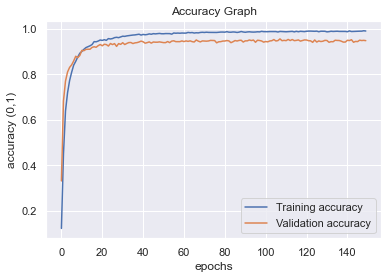

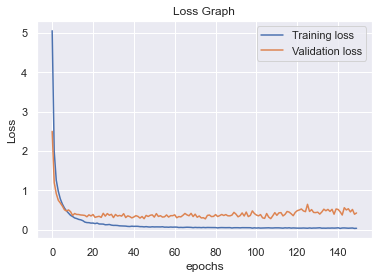

In [ ]:
plt.figure(0)
plt.plot(history_mod1.history['accuracy'], label="Training accuracy")
plt.plot(history_mod1.history['val_accuracy'], label="Validation accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history_mod1.history['loss'], label="Training loss")
plt.plot(history_mod1.history['val_loss'], label="Validation loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot the Confusion Matrix after training with balanced dataset

395/395 [==============================] - 2s 4ms/step


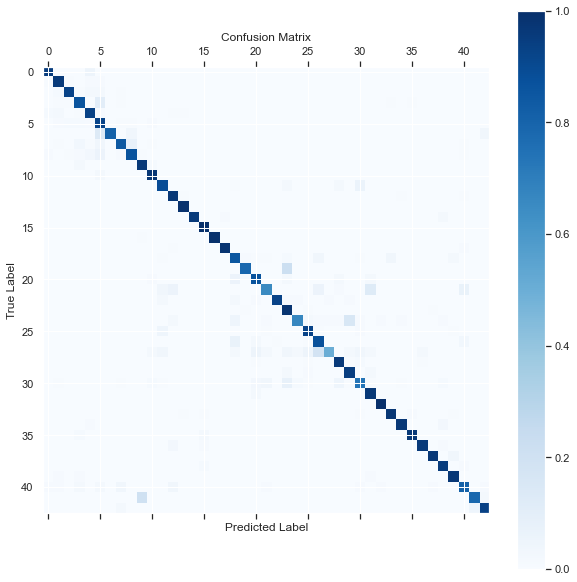

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
y_pred = modified_model_svm.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Compute the total sample count for each class
class_sample_count = np.sum(conf_mat, axis=1)

# Calculate the percentage for each element in the confusion matrix
conf_mat_percent = (conf_mat.T / class_sample_count).T 

# Plot the confusion matrix with percentage values
plt.figure(figsize=(10, 10))
plt.matshow(conf_mat_percent, cmap=plt.cm.Blues, fignum=1)

# Add colorbar for percentage scale
plt.colorbar()

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

In [ ]:
print("Evaluate")
result = modified_model_svm.evaluate(x=X_test_prep, y=y_test)
dict(zip(modified_model_svm.metrics_names, result))

Evaluate
395/395 [==============================] - 2s 5ms/step - loss: 0.6694 - accuracy: 0.9244


{'loss': 0.6694464087486267, 'accuracy': 0.9243863821029663}

In [ ]:
print("Evaluate")
result = modified_model_svm1.evaluate(x=X_test_prep, y=y_test)
dict(zip(modified_model_svm1.metrics_names, result))

In [ ]:
# Save the model
modified_model_svm.save('Modified_saved_model_svm/')

INFO:tensorflow:Assets written to: Modified_saved_model_svm/assets


INFO:tensorflow:Assets written to: Modified_saved_model_svm/assets


----
# 5. Additional Results


## 5.1 Load and Output Images from Web
Load image and plot them here

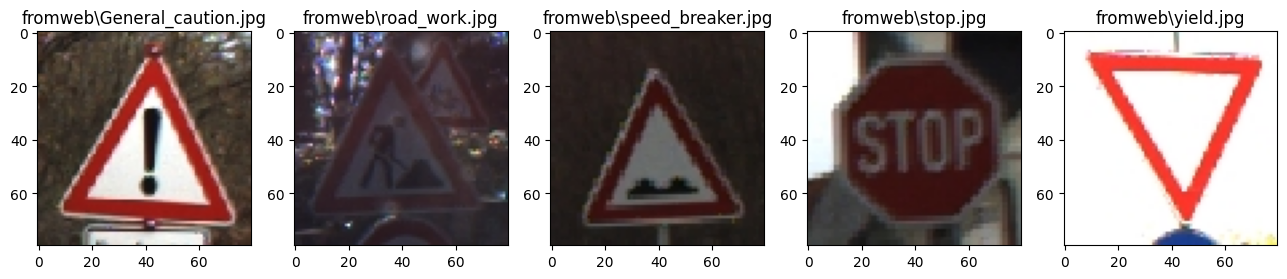

In [15]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import matplotlib.image as mpimg

webImagesDir = 'fromweb'
imageNames = glob.glob('fromweb/*.jpg')
webImages = [ mpimg.imread('./' + imgName ) for imgName in imageNames ]

fig, axes = plt.subplots(ncols=len(webImages), figsize=(16, 8))
for ax, image, imageName in zip(axes, webImages, imageNames):
    ax.imshow(image)
    ax.set_title(imageName)

### 5.1.1 Predict the Sign Type for Each Image

In [16]:
img_paths = os.listdir("fromweb")

images_test = []

for img_path in img_paths:
    # read image from file
    img = mpimg.imread(os.path.join("fromweb", img_path))
    img = cv2.resize(img, image_shape[0:2], interpolation=cv2.INTER_CUBIC)
    images_test.append(img)

X_web = preprocess_image(images_test)

### 5.1.2 Load a saved model

In [38]:
new_model = tf.keras.models.load_model('./LeNet_saved_model/')
new_model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 16, 16, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               69240

### 5.1.3 Analyze Performance

In [18]:
### Calculate the accuracy
prediction = new_model.predict(X_web)

probas = np.array(prediction)
labels = np.argmax(probas, axis=-1)    
print(labels)


1/1 [==============================] - 0s 83ms/step
[18 25 22 14 13]


### 5.1.4 Read list of class from csv file and store it in a python dictionary

In [19]:
import pandas as pd
dt = pd.read_csv('signnames.csv').to_dict()

print(dt["SignName"])
print("\n")

class_ids = []

for el in range(0,len(dt["SignName"])):
    class_ids.append(dt["SignName"][el])
print(class_ids)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

### 5.1.5 Prediction Confirmation on downloaded images from the web

In [20]:
expected_prediction = ['General caution', 'Road work', 'Bumpy road', 'Stop', 'Yield']
prediction_list = []

for el in range(0,len(labels)):
    prediction_list.append(dt["SignName"][labels[el]])
    
print(prediction_list)

['General caution', 'Road work', 'Bumpy road', 'Stop', 'Yield']


---

# 6. Discussion

Discuss the results and analysis, provide some insight about system performance, 
including strengths, weaknesses, limitations and possible future work. 

## 6.1 Comparative Analysis with Differnet Models

In [17]:
import os
import pandas as pd
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score
import numpy as np
models_path = "./models/"
model_names = [name for name in os.listdir(models_path) if os.path.isdir(os.path.join(models_path, name))]

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1'])

for idx, model_name in enumerate(model_names):
    load_model = tf.keras.models.load_model(os.path.join(models_path, model_name))
    # Evaluate
    predictions = load_model.predict(X_test_prep)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    _, accuracy = load_model.evaluate(X_test_prep, y_test, verbose=0)
    precision = precision_score(true_classes, predicted_classes, average='weighted')
    recall = recall_score(true_classes, predicted_classes, average='weighted')
    F1 = 2 * precision * recall / (precision + recall)
    
    # Append the result
    results.loc[idx] = [model_name, precision, recall, F1]
    
    
# Print the DataFrame
results = results.to_string(formatters={
    'Precision': '{:,.2%}'.format,
    'Recall': '{:,.2%}'.format,
    'F1': '{:,.2%}'.format
})
print(results)




395/395 [==============================] - 38s 95ms/step
                    Model Precision Recall     F1
0               LeNet_svm    92.74% 92.44% 92.59%
1                   LeNet    90.69% 90.51% 90.60%
2  LeNet_Dropout_balanced    93.70% 93.32% 93.51%
3           LeNet_Dropout    93.85% 93.68% 93.77%
4          LeNet_balanced    91.47% 91.13% 91.30%
5                     VGG    92.14% 91.99% 92.07%


Result for Yolov5s:
| Model                                           |     P   |     R   | mAP50 | mAP50-95 |
|-------------------------------------------------|---------|---------|-------|----------|
| Yolov5s                                         | 0.922   | 0.92    | 0.942 | 0.902    |

__Conclusion__

In this project, we conducted a comparative analysis of three existing models: LeNet, VGG, and YOLOv5. Additionally, we introduced two modifications to LeNet by adding dropout layers and employing an SVM classifier.

A detailed examination of our test results indicate that YOLO has the best performance over the existing models, achieving an F1-score of 92.10%. The VGG model follows closely with an F1-score of 92.07%. However, when considering the computational time, VGG indicates significantly higher efficiency than YOLOv5. Compare to our modified models, the significant enhancements in our models are evident, as both variations raised the F1-score for LeNet from 90.60% to over 92.50%, surpassing the performance of all other models.

Our experiments were conducted on two distinct training sets: the original source dataset and a balanced version of the dataset. When comparing the performance of the original LeNet and LeNet with dropout trained on different datasets, we observed that the LeNet model trained on the balanced dataset overcome the same model trained on the imbalanced dataset in terms of F1-score. However, this trend did not hold for the modified LeNet model with dropout as it achieved a lower score when trained on the balanced dataset. This unexpected outcome can be explained by that dropout is used to inhibit overfitting.Thus, It can also partially mitigate the impact of an imbalanced dataset. Since the balanced dataset contains fewer instances than the imbalanced one, the introduction of balanced dataset led to a slight reduction in performance.

In conclusion, YOLO achieves the best performance among the chosen models while balanced dataset can improve the performance. The modified versions of LeNet exceeded our expectations, significantly increasing accuracy and outperforming the YOLO model. After careful comparison, we are confident that the modified model with dropout layers successfully fulfills the objectives of our project for traffic sign classification.


## 6.2 Limitations

For this project, we successfully explored various models for classification but didn’t have a chance to analyze the detection models. This limitation is due to time constraints and hardware limitations, restricting a comprehensive solution that includes both detection and classification. Furthermore, we found a possible way to enhance the YOLOv5 model's performance with this training data, but this improvement was left unrealized also due to hardware constraints. The project's generalizability to other traffic sign datasets or real-world scenarios might also need further validation, and the lack of testing with diverse or real-world data could limit the models' applicability. In exploring OCR for traffic sign recognition, the use of the Tesseract OCR engine shows promise, especially with pre-processed grayscale images. While effective for signs containing text, OCR's applicability is limited to signs with textual characters, offering a potential avenue for enhancing traffic sign detection and interpretation. Overall, these limitations indicate the challenges and complexities in balancing resources and choices in methods within traffic sign recognition. We will include some possible improvements for this project in the future.

## 6.3 Future Work

### 6.3.1 With Optical character recognition (OCR) technique added

For future improvement, we also would like to try OCR technique for recognizing texts in the traffic signs. We tried Tesseract OCR engine, which is a popular and open-source OCR library. We have pre-processed the images to grayscale already as Tesseract primarily works with grayscale images. For traffic signs that contain textual characters (e.g., speed limit signs, stop signs with text), we can use the OCR approach to recognize the text. This will give the textual information present in those signs. For traffic signs that do not contain any textual characters (e.g., yield signs, warning signs with symbols only), OCR won't be able to recognize the text. For example, the simple code we wrote below detect the text from a stop sign.

In [ ]:
import pytesseract
from PIL import Image
import cv2
import numpy as np

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def ocr_image(image):
    text = pytesseract.image_to_string(image)
    return text

def preprocess_image(image_path):
    # Open the image using PIL (Python Imaging Library)
    try:
        img = Image.open(image_path)
    except FileNotFoundError:
        return None

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Convert the numpy array back to a PIL Image
    pil_image = Image.fromarray(img_gray)
    pil_image.show()

    return pil_image

image_path = './notebook_images/ocr_example1.png'

# Preprocess the image to grayscale
preprocessed_image = preprocess_image(image_path)

recog_text = ocr_image(preprocessed_image)
print(recog_text)


STOP



From the refined Mask R-CNN model proposed by Megalingam et al., we see the potential to use OCR for character recognition in traffic signs. They employed OCR for the masked image to derive the circumscribed numbers or textual characters. They first checked whether the masked traffic sign image has any characters. If the answer is yes, then the characters are recognized accordingly. Please see example figure in their work:

Reference: Rajesh Kannan Megalingam, Kondareddy Thanigundala, Sreevatsava Reddy Musani, Hemanth Nidamanuru, Lokesh Gadde,
Indian traffic sign detection and recognition using deep learning,
International Journal of Transportation Science and Technology,
https://doi.org/10.1016/j.ijtst.2022.06.002.
(https://www.sciencedirect.com/science/article/pii/S2046043022000557)

![image](./notebook_images/Megalingam_ocr.jpg)

Despite that we cannot fully explore their idea due to time constraint of the project, it would be an interesting area to investigate further for improved accuracy in traffic sign detection and classification.

### 6.3.2 Augmentation and Balance the Dataset

From our examination of the training dataset, we noticed that it is imbalanced, with the largest class containing over 2000 images and the smallest class having only 180 images. This imbalance led to misclassification in several instances, particularly noticeable in the results for YOLOv5. For example, certain classes, such as "Turn right ahead" and "Turn left ahead," were frequently confused with each other and with "Ahead only." This confusion can be largely attributed to the dataset's imbalance and the lack of preprocessing like rotation for YOLOv5. For instance, there were only 360 images for "Turn left ahead" compared to 599 images for "Turn right ahead."

Our analysis of the result file __yolov5s_training_record.ipynb__ further confirmed that the performance was inadequate for classes with fewer instances, while the precision exceeded 98% for classes with sufficient instances. We concluded that augmenting the dataset and retaining most of the pictures could lead to significant improvements in YOLOv5s' performance. However, given the time-intensive nature of both augmentation and training YOLOv5, we had to abandon this plan. The time and resource constraints prevented us from exploring this method for enhancement.

![Alternative Text](<notebook_images/imbalance.png>)

### 6.3.3 Generalization and Real-World Applicability: 

Although the project utilized well-established datasets, the models' generalizability to other traffic sign datasets or real-world images need further validation. The lack of testing with diverse data could limit the applicability of the developed models outside the specific context of the project.

---
__Reference__

[1] Wu, Ziliang & Zhang, Duo & Shao, Yanhua & Zhang, Xiaoqiang & Zhang, Xingping & Feng, Yupei & Cui, Peng. (2021). Using YOLOv5 for Garbage Classification. 35-38. 10.1109/PRAI53619.2021.9550790. ​

[2] Zhu, X., Lyu, S., Wang, X., & Zhao, Q. (2021). TPH-YOLOv5: Improved YOLOv5 based on transformer prediction head for object detection on drone-captured scenarios. In Proceedings of the IEEE/CVF international conference on computer vision (pp. 2778-2788).​

[3] Wang, C. Y., Bochkovskiy, A., & Liao, H. Y. M. (2023). YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 7464-7475). ​

[4] Xu, R., Lin, H., Lu, K., Cao, L., & Liu, Y. (2021). A forest fire detection system based on ensemble learning. Forests, 12(2), 217.​

[5] Stallkamp, J., Schlipsing, M., Salmen, J., & Igel, C. (2012). Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition. Neural networks, 32, 323-332. ​

[6] Ultralytics. (2023). Yolov5 [Software]. GitHub. https://github.com/ultralytics/yolov5

[7] Megalingam, R. K., Thanigundala, K., Musani, S. R., Nidamanuru, H., & Gadde, L. (2023). Indian traffic sign detection and recognition using deep learning. International Journal of Transportation Science and Technology, 12(3), 683-699. https://doi.org/10.1016/j.ijtst.2022.06.002

[8] Udacity. (n.d.). CarND-Traffic-Sign-Classifier-Project. GitHub. Retrieved [Aug 2, 2023], from https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project

[9] DataFlair. (n.d.). Custom Object Detection Using YOLO. Retrieved [Aug 2, 2023], from https://data-flair.training/blogs/custom-object-detection-yolo/

[10] Udacity. (n.d.). Traffic Signs Data. Retrieved [Aug 2, 2023], from https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip​

[11] Kaggle User (meowmeowmeowmeowmeow). (n.d.). GTSRB - German Traffic Sign. Kaggle. Retrieved [Date of Retrieval], from https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign​

[12] Keras. (n.d.). Reduce Learning Rate on Plateau. Retrieved [Aug 2, 2023], from https://keras.io/api/callbacks/reduce_lr_on_plateau/​

[13] The Signal Archive. (n.d.). Published Archive. Retrieved [Aug 2, 2023], from https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html

[14] N. Yu, P. Jiao and Y. Zheng, "Handwritten digits recognition base on improved LeNet5," The 27th Chinese Control and Decision Conference (2015 CCDC), Qingdao, China, 2015, pp. 4871-4875, doi: 10.1109/CCDC.2015.7162796.​

[15] Eyewitness News. (2015, October 20). Global road accident fatalities. Retrieved [Aug 2, 2023], from https://ewn.co.za/2015/10/20/Global-road-accident-fatalities

[16] Kalyanov, D. (2021) From hours to minutes: 600x faster SVM, Medium. Available at: https://medium.com/intel-analytics-software/from-hours-to-minutes-600x-faster-svm-647f904c31ae

[17] Quick Start - Intel(R) Extension for Scikit-learn* 2023.2 documentation (no date) Intel(R) Extension for Scikit-learn. Available at: https://intel.github.io/scikit-learn-intelex/quick-start.html

[18] Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). You Only Look Once: Unified, Real-Time Object Detection. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 779-788).

[19] Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition. arXiv preprint arXiv:1409.1556.
